In [90]:
import xlrd
import pandas as pd
import numpy as np
import os
from pathlib import Path
import statistics as st 
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
from scipy import stats
import scipy.stats as stats
import numpy as np
import seaborn as sns
import yfinance as yf
from datetime import datetime

In [2]:
this_dir = Path().resolve()
chapter_dir = this_dir / "Planilhas_Livro_Mercado_Financeiro/Cap3"

In [3]:
dicio = {"Dow Jones": "DowJ.xlsx", "Ibovespa": "Ibv.xlsx", 
         "PETR4": "Petrobras.xlsx", "VALE3": "Vale3.xlsx",
         "Bitcoin": "BitCoin.xlsx"}

In [4]:
teste = pd.read_excel(chapter_dir / "Teste.xlsx", header=None)
teste.head()

,0,1
0,1,10
1,2,-4
2,3,2
3,4,3
4,5,11


In [5]:
estat_dados = pd.read_excel(chapter_dir / "EstatDad.xlsx", header=None)
estat_dados.head()

,0,1
0,1,10
1,2,9
2,3,8
3,4,9
4,5,9


In [6]:
media = st.mean(estat_dados[1])
mediana = st.median(estat_dados[1])
desvioP = st.pstdev(estat_dados[1])
desvioA = st.stdev(estat_dados[1])

In [7]:
print(f"********** RESUMO DAS ESTATÍTICAS **********")
print(f"MÉDIA MEDIANA DESV.P DESV.A")
print(f"{media:5.2f} {mediana:5.2f} {desvioP:6.2f} {desvioA:6.2f}")

********** RESUMO DAS ESTATÍTICAS **********
MÉDIA MEDIANA DESV.P DESV.A
 9.35  9.00   1.74   1.79


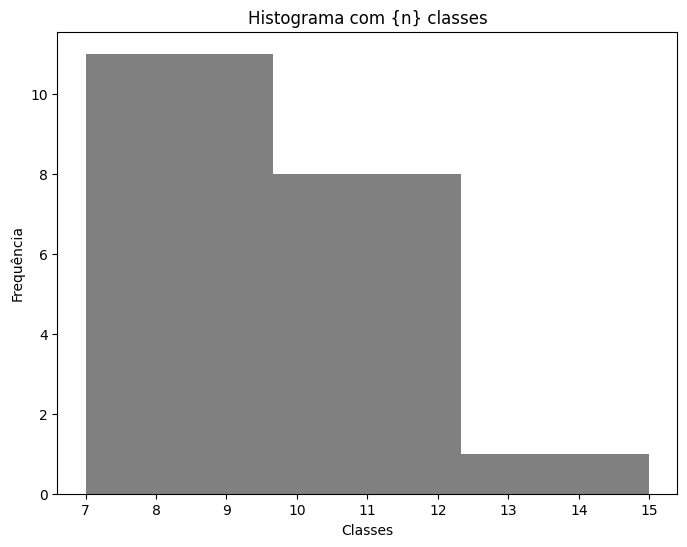

In [8]:
n = 3
plt.figure(figsize=(8,6))
plt.hist(estat_dados[1], bins=n, color="gray")
plt.xlabel("Classes")
plt.ylabel("Frequência")
plt.title("Histograma com {n} classes")
plt.show()

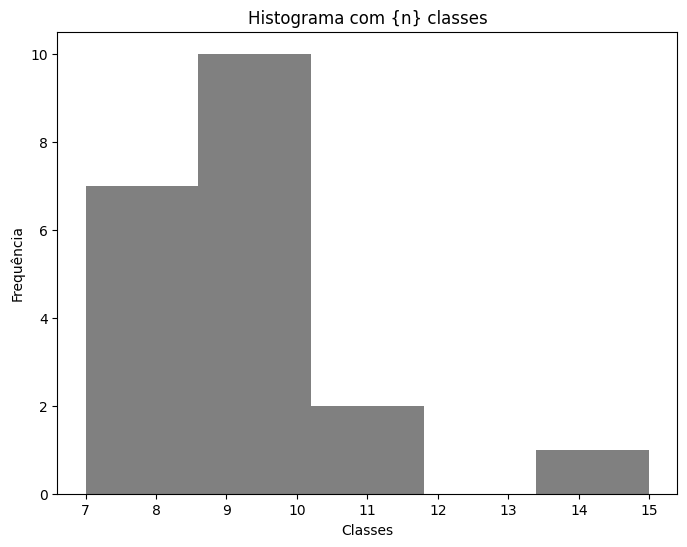

In [9]:
n = 5
plt.figure(figsize=(8,6))
plt.hist(estat_dados[1], bins=n, color="gray")
plt.xlabel("Classes")
plt.ylabel("Frequência")
plt.title("Histograma com {n} classes")
plt.show()

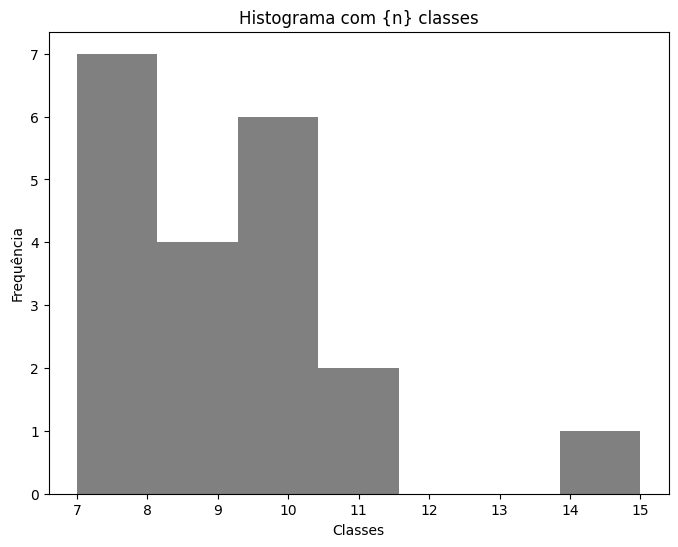

In [10]:
n = 7
plt.figure(figsize=(8,6))
plt.hist(estat_dados[1], bins=n, color="gray")
plt.xlabel("Classes")
plt.ylabel("Frequência")
plt.title("Histograma com {n} classes")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x119a67750>,
 'caps': [<matplotlib.lines.Line2D at 0x119a679d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x119a67610>],
 'medians': [<matplotlib.lines.Line2D at 0x119a67c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x119a67d90>],
 'means': []}

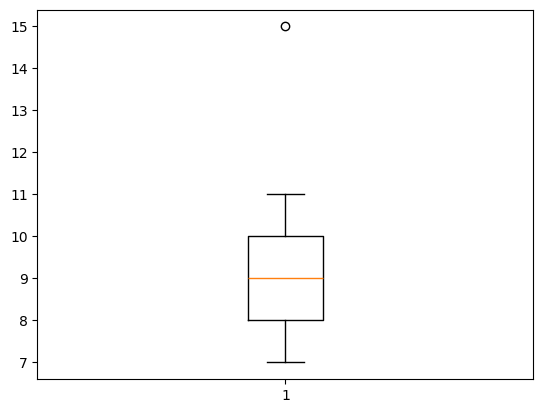

In [11]:
plt.figure()
plt.boxplot(estat_dados[1], vert=True)

# Exemplo 3.1

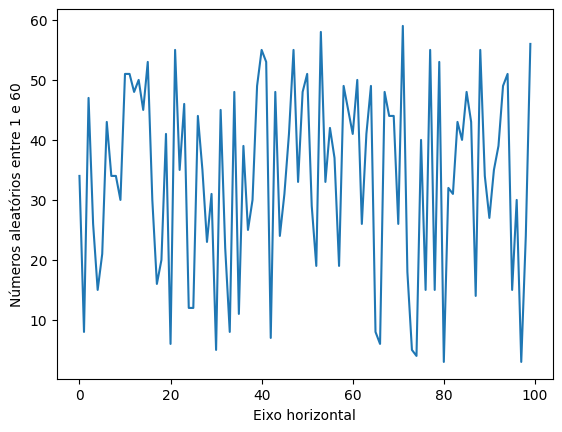

In [12]:
aleatorio = [random.randint(1, 60) for _ in range(100)]

plt.plot(aleatorio)
plt.ylabel("Números aleatórios entre 1 e 60")
plt.xlabel("Eixo horizontal")
plt.show()

# Exemplo 3.2

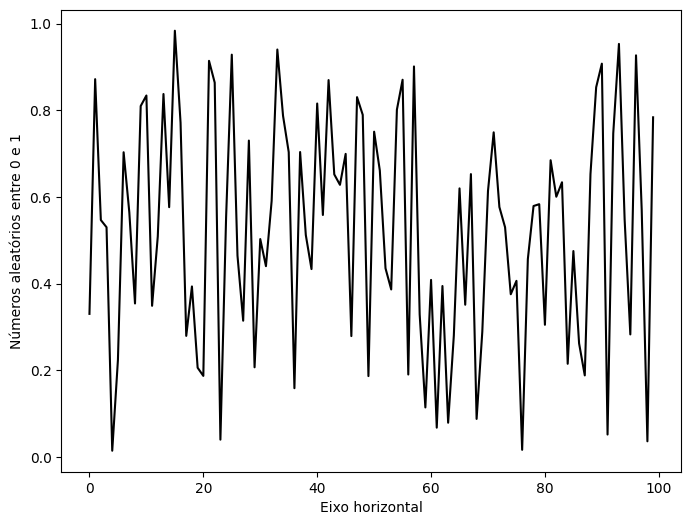

In [13]:
aleatorios = [random.random() for _ in range(100)]

plt.figure(figsize=(8,6))
plt.plot(aleatorios, color="black")
plt.ylabel("Números aleatórios entre 0 e 1")
plt.xlabel("Eixo horizontal")
plt.show()

# Exemplo 3.3

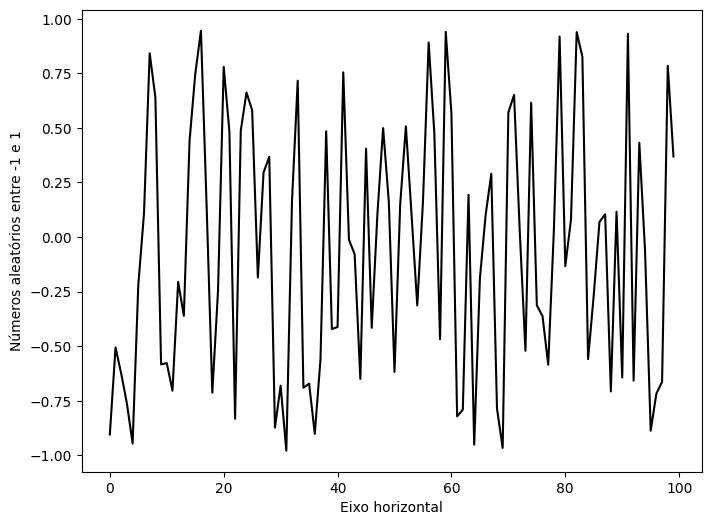

In [14]:
aleatorios = [random.uniform(-1, 1) for _ in range(100)]

plt.figure(figsize=(8,6))
plt.plot(aleatorios, color="black")
plt.ylabel("Números aleatórios entre -1 e 1")
plt.xlabel("Eixo horizontal")
plt.show()

# Distribuição Uniforme

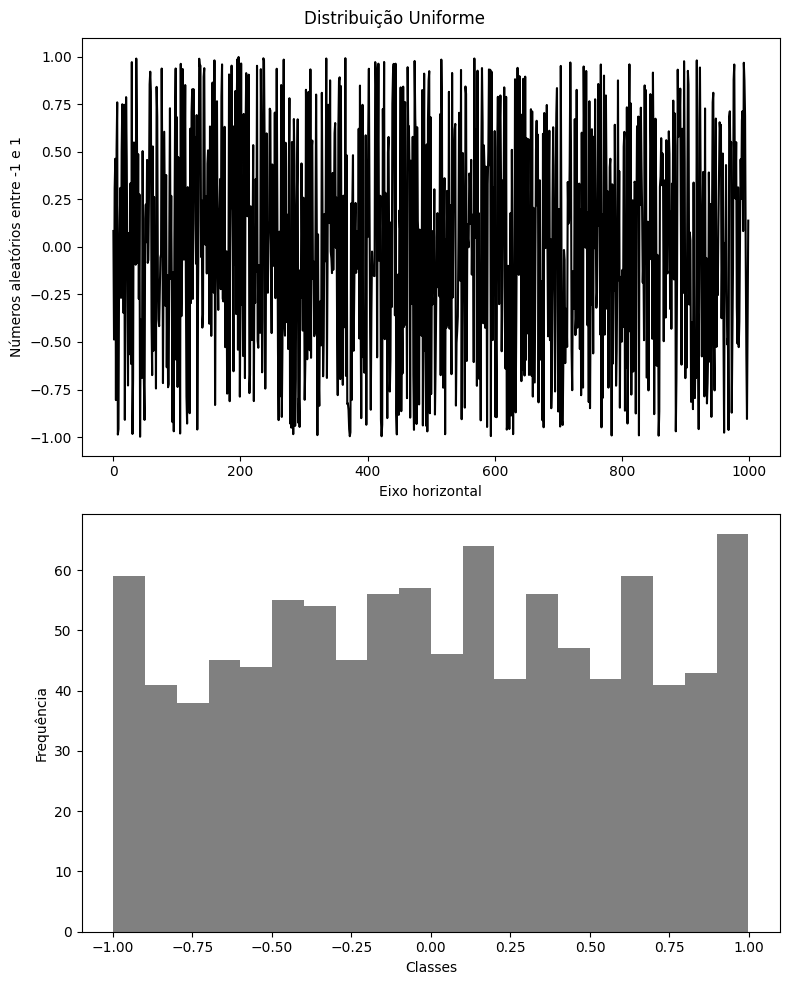

In [15]:
uniforme = [random.uniform(-1, 1) for _ in range(1000)]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax[0].plot(uniforme, color="black")
ax[0].set_ylabel("Números aleatórios entre -1 e 1")
ax[0].set_xlabel("Eixo horizontal")

ax[1].hist(uniforme, bins=20, color="gray")
ax[1].set_ylabel("Frequência")
ax[1].set_xlabel("Classes") 

plt.suptitle("Distribuição Uniforme")
plt.tight_layout()
plt.show()


# 3.6.2 Distribuição Normal ou Gaussiana

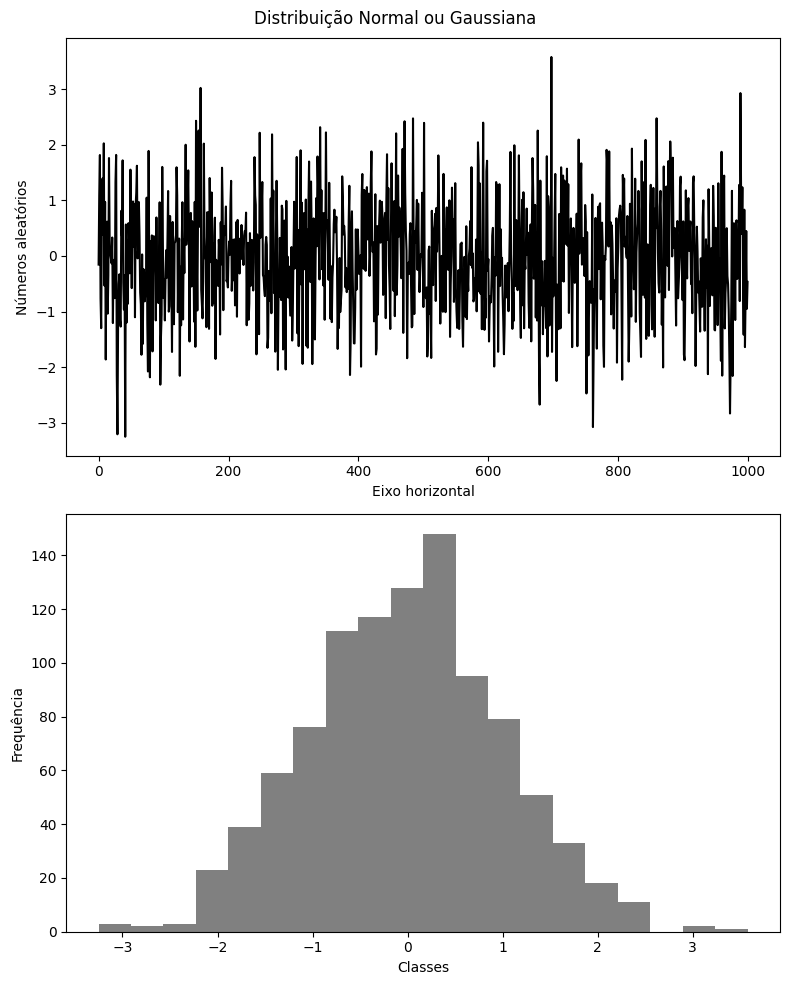

In [16]:
gaussiana = [random.gauss(0, 1) for _ in range(1000)]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax[0].plot(gaussiana, color="black")
ax[0].set_ylabel("Números aleatórios")
ax[0].set_xlabel("Eixo horizontal")

ax[1].hist(gaussiana, bins=20, color="gray")
ax[1].set_ylabel("Frequência")
ax[1].set_xlabel("Classes") 

plt.suptitle("Distribuição Normal ou Gaussiana")
plt.tight_layout()
plt.show()

# 3.6.3 Distribuição Gama

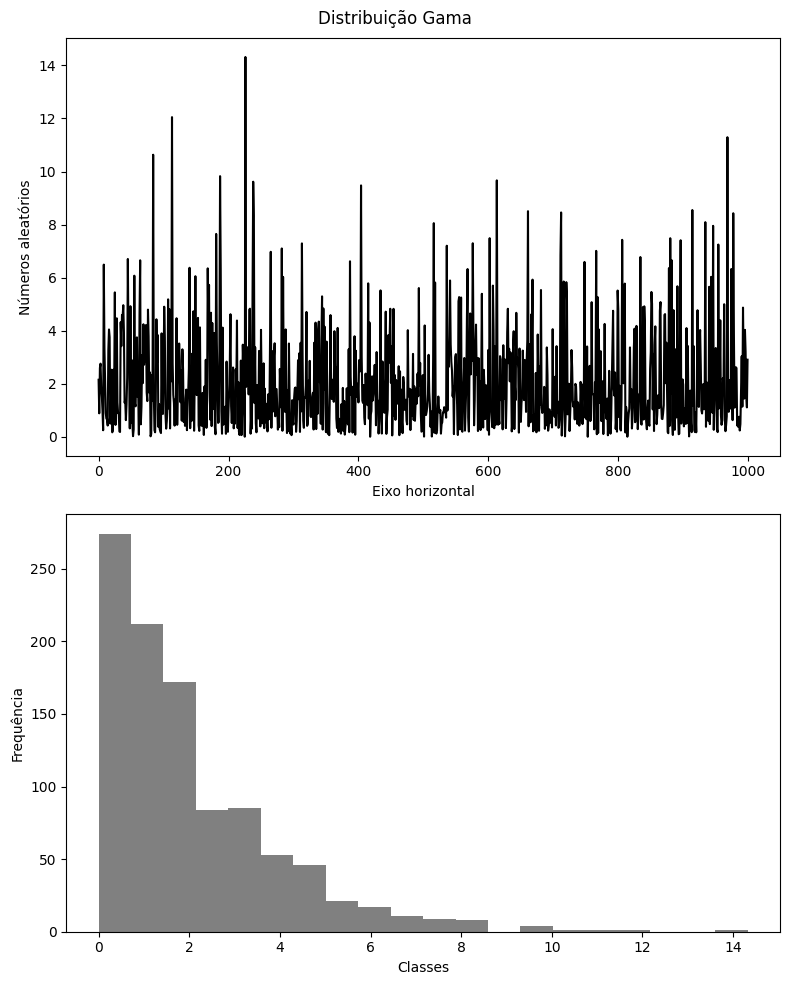

In [17]:
gama = [random.gammavariate(1, 2) for _ in range(1000)]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax[0].plot(gama, color="black")
ax[0].set_ylabel("Números aleatórios")
ax[0].set_xlabel("Eixo horizontal")

ax[1].hist(gama, bins=20, color="gray")
ax[1].set_ylabel("Frequência")
ax[1].set_xlabel("Classes") 

plt.suptitle("Distribuição Gama")
plt.tight_layout()
plt.show()

# 3.7 Ajuste de distribuições de probabilidades aos dados

(array([0.00878538, 0.00585692, 0.00878538, 0.06735457, 0.11420992,
        0.17277912, 0.22256293, 0.32798748, 0.34262977, 0.37484283,
        0.43341202, 0.27820366, 0.23134831, 0.14935144, 0.09663917,
        0.05271227, 0.03221306, 0.        , 0.00585692, 0.00292846]),
 array([-3.2513863 , -2.90990985, -2.5684334 , -2.22695694, -1.88548049,
        -1.54400403, -1.20252758, -0.86105112, -0.51957467, -0.17809822,
         0.16337824,  0.50485469,  0.84633115,  1.1878076 ,  1.52928405,
         1.87076051,  2.21223696,  2.55371342,  2.89518987,  3.23666633,
         3.57814278]),
 <BarContainer object of 20 artists>)

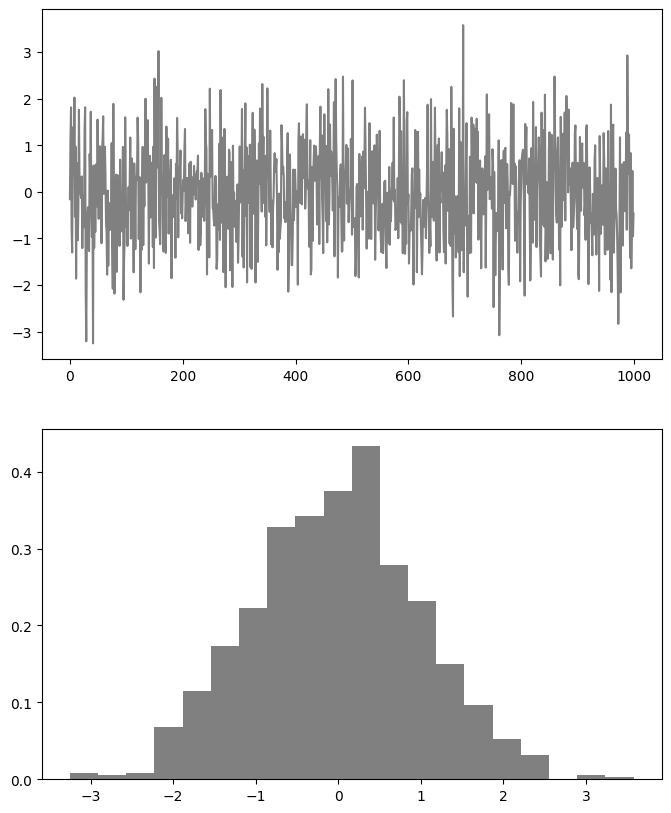

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax[0].plot(gaussiana, color ="gray")
ax[1].hist(gaussiana, bins=20, color="gray", density=True)

# ax[1].hist(gama)

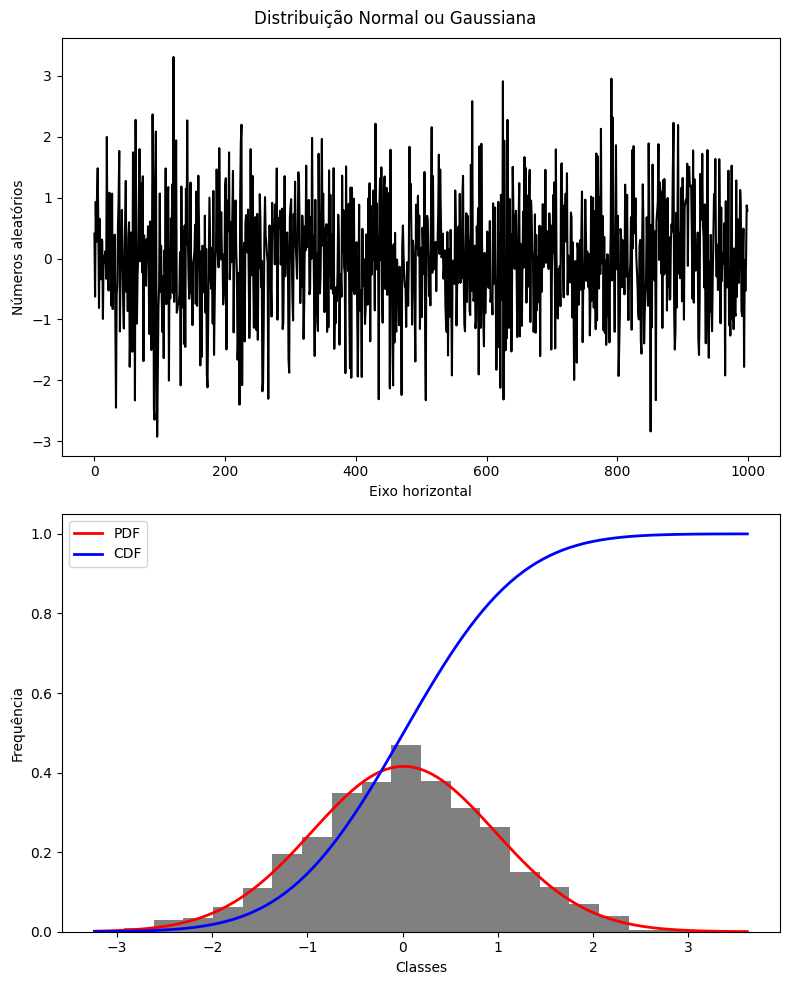

In [19]:
gaussiana = [random.gauss(0, 1) for _ in range(1000)]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax[0].plot(gaussiana, color="black")
ax[0].set_ylabel("Números aleatórios")
ax[0].set_xlabel("Eixo horizontal")

ax[1].hist(gaussiana, bins=20, color="gray", density=True)
ax[1].set_ylabel("Frequência")
ax[1].set_xlabel("Classes") 

xmin, xmax = plt.xlim()
media = st.mean(gaussiana)
desvio = st.pstdev(gaussiana)
eixo_x = np.linspace(xmin, xmax, 100)
eixo_y = norm.pdf(eixo_x, media, desvio)
cdf = norm.cdf(eixo_x, media, desvio)
ax[1].plot(eixo_x, eixo_y, 'r-', lw=2)
ax[1].plot(eixo_x, cdf, 'b-', lw=2)
ax[1].legend(['PDF', 'CDF'], loc="upper left")

plt.suptitle("Distribuição Normal ou Gaussiana")
plt.tight_layout()
plt.show()



In [20]:
print(f"********** RESUMO DAS ESTATÍTICAS **********")
print(f"Média: {media:.5f}")
print(f"Desvio Padrão: {desvioP:.5f}")
print(f"Desvio Amostral: {desvioA:.5f}")

********** RESUMO DAS ESTATÍTICAS **********
Média: 0.00940
Desvio Padrão: 1.73997
Desvio Amostral: 1.78517


# 3.8 ANÁLISES ESTATÍSTICAS PARA DADOS REAIS DO MERCADO FINANCEIRO

In [21]:
df = pd.read_excel(chapter_dir / "Ibv.xlsx", index_col=0, header=None)
df.head()

,1
0,
2018-01-02,77891
2018-01-03,77995
2018-01-04,78647
2018-01-05,79071
2018-01-08,79379


In [22]:
retornos = df.pct_change().dropna()


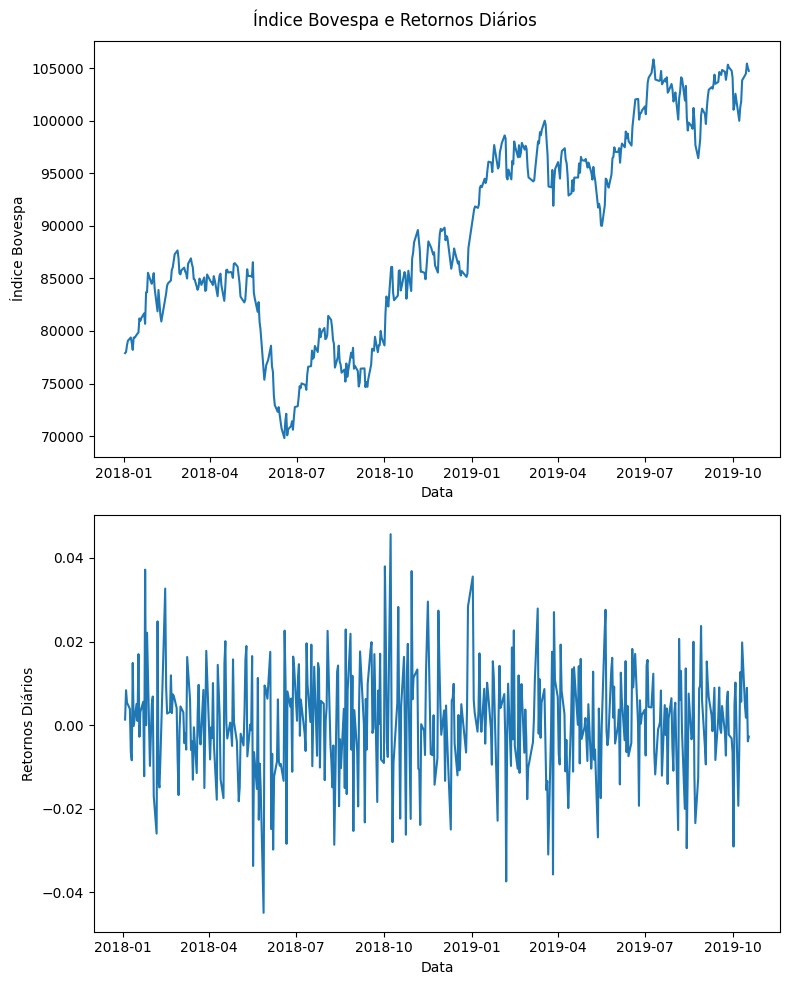

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax[0].plot(df)
ax[0].set_ylabel("Índice Bovespa")
ax[0].set_xlabel("Data")
ax[1].plot(retornos)
ax[1].set_ylabel("Retornos Diários")
ax[1].set_xlabel("Data")
plt.suptitle("Índice Bovespa e Retornos Diários")
plt.tight_layout()
plt.show()

xmin: -0.0494230069202044, xmax: 0.05022819843083381


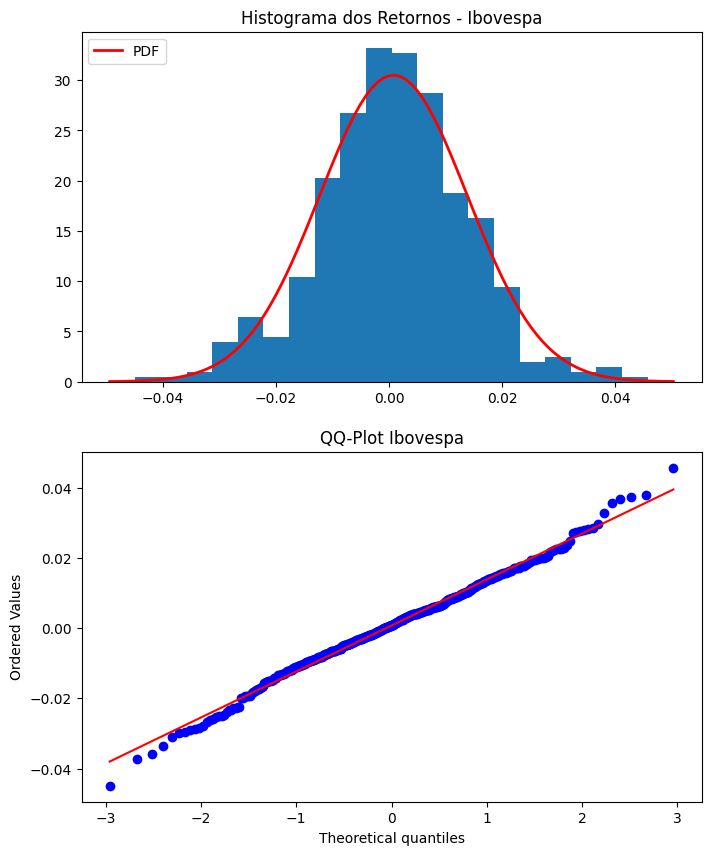

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax[0].hist(retornos, bins=20, density=True)
ax[0].set_title("Histograma dos Retornos - Ibovespa")
xmin, xmax = ax[0].get_xlim()
print(f"xmin: {xmin}, xmax: {xmax}")
media = retornos.mean()
desvio = retornos.std()
eixo_x = np.linspace(xmin, xmax, 100)
eixo_y = norm.pdf(eixo_x, media, desvio)
cdf = norm.cdf(eixo_x, media, desvio)
ax[0].plot(eixo_x, eixo_y, 'r-', lw=2)
ax[0].legend(['PDF'], loc="upper left")
stats.probplot(retornos[1], dist="norm", plot=ax[1])
ax[1].set_title("QQ-Plot Ibovespa")
plt.show()


In [25]:
df = pd.read_excel(chapter_dir / "Petrobras.xlsx", index_col=0, header=None)
retornos = df.pct_change().dropna()


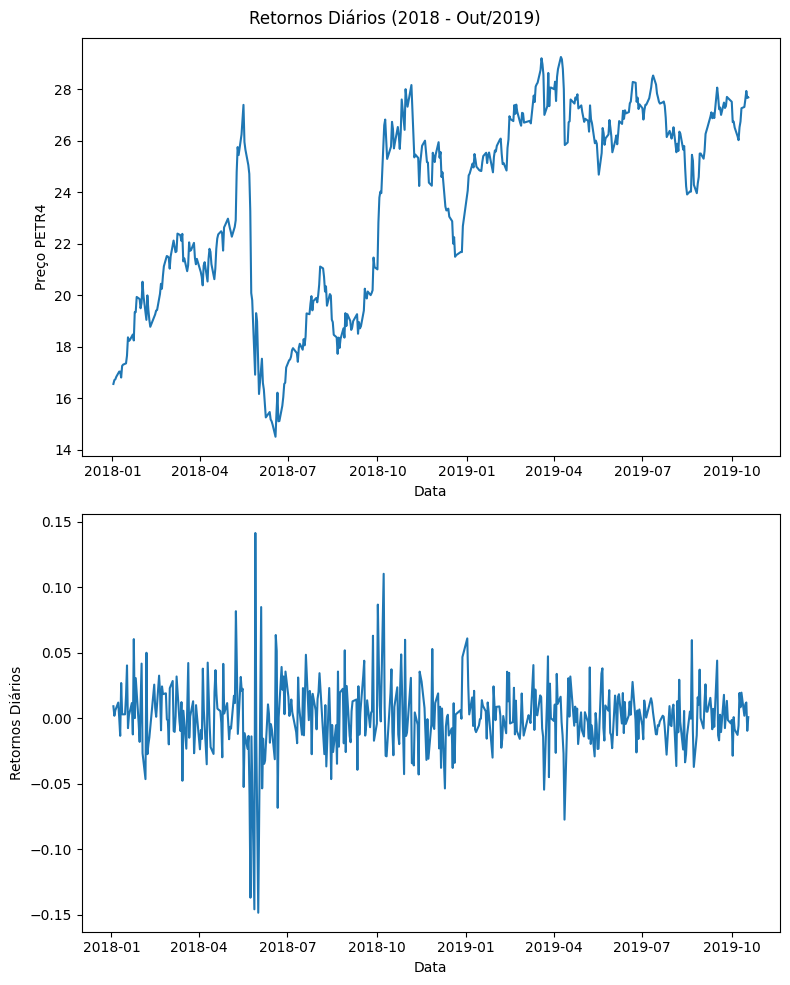

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax[0].plot(df)
ax[0].set_ylabel("Preço PETR4")
ax[0].set_xlabel("Data")
ax[1].plot(retornos)
ax[1].set_ylabel("Retornos Diários")
ax[1].set_xlabel("Data")
plt.suptitle("Retornos Diários (2018 - Out/2019)")
plt.tight_layout()
plt.show()

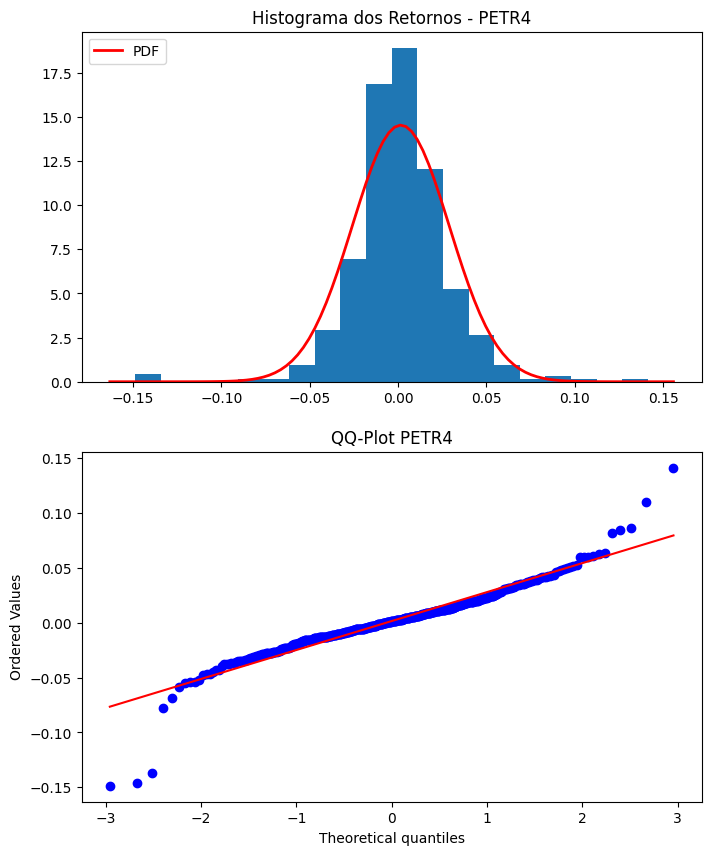

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax[0].hist(retornos, bins=20, density=True)
ax[0].set_title("Histograma dos Retornos - PETR4")
xmin, xmax = ax[0].get_xlim()
media = retornos.mean()
desvio = retornos.std()
eixo_x = np.linspace(xmin, xmax, 100)
eixo_y = norm.pdf(eixo_x, media, desvio)
cdf = norm.cdf(eixo_x, media, desvio)
ax[0].plot(eixo_x, eixo_y, 'r-', lw=2)
ax[0].legend(['PDF'], loc="upper left")
stats.probplot(retornos[1], dist="norm", plot=ax[1])
ax[1].set_title("QQ-Plot PETR4")
plt.show()


# Exemplo 3.6 - VALE3

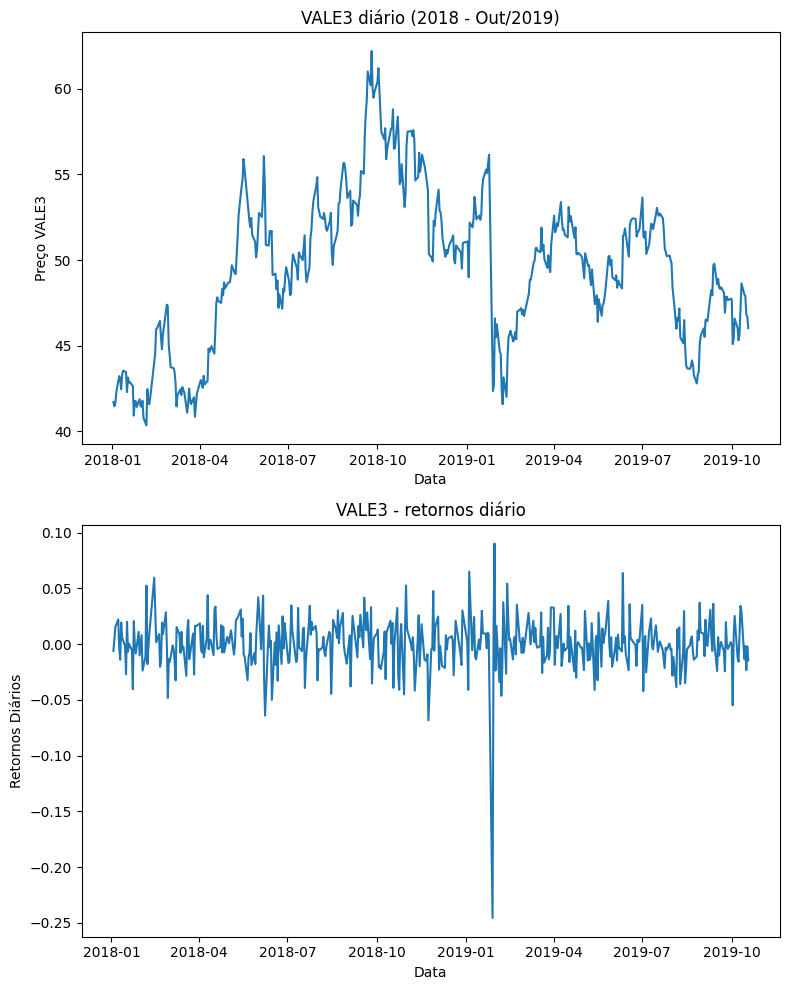

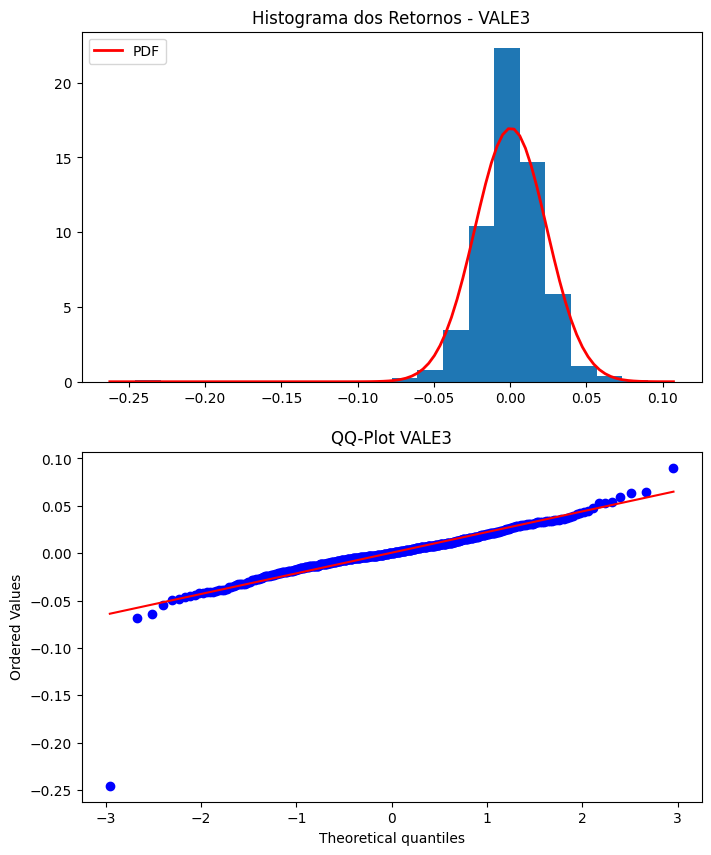

In [28]:
df = pd.read_excel(chapter_dir / "Vale3.xlsx", index_col=0, header=None)
retornos = df.pct_change().dropna()

def plota_graficos(df, retornos, empresa):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
    ax[0].plot(df)
    ax[0].set_ylabel(f"Preço {empresa}")
    ax[0].set_xlabel("Data")
    ax[0].set_title(f"{empresa} diário (2018 - Out/2019)")
    ax[1].plot(retornos)
    ax[1].set_ylabel("Retornos Diários")
    ax[1].set_xlabel("Data")
    ax[1].set_title(f"{empresa} - retornos diário")
    plt.tight_layout()
    plt.show()
    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
    ax[0].hist(retornos, bins=20, density=True)
    ax[0].set_title(f"Histograma dos Retornos - {empresa}")
    xmin, xmax = ax[0].get_xlim()
    media = retornos.mean()
    desvio = retornos.std()
    eixo_x = np.linspace(xmin, xmax, 100)
    eixo_y = norm.pdf(eixo_x, media, desvio)
    cdf = norm.cdf(eixo_x, media, desvio)
    ax[0].plot(eixo_x, eixo_y, 'r-', lw=2)
    ax[0].legend(['PDF'], loc="upper left")
    stats.probplot(retornos[1], dist="norm", plot=ax[1])
    ax[1].set_title(f"QQ-Plot {empresa}")
    plt.show()
    
plota_graficos(df, retornos, "VALE3")

# Exemplo 3.7 - Bitcoin

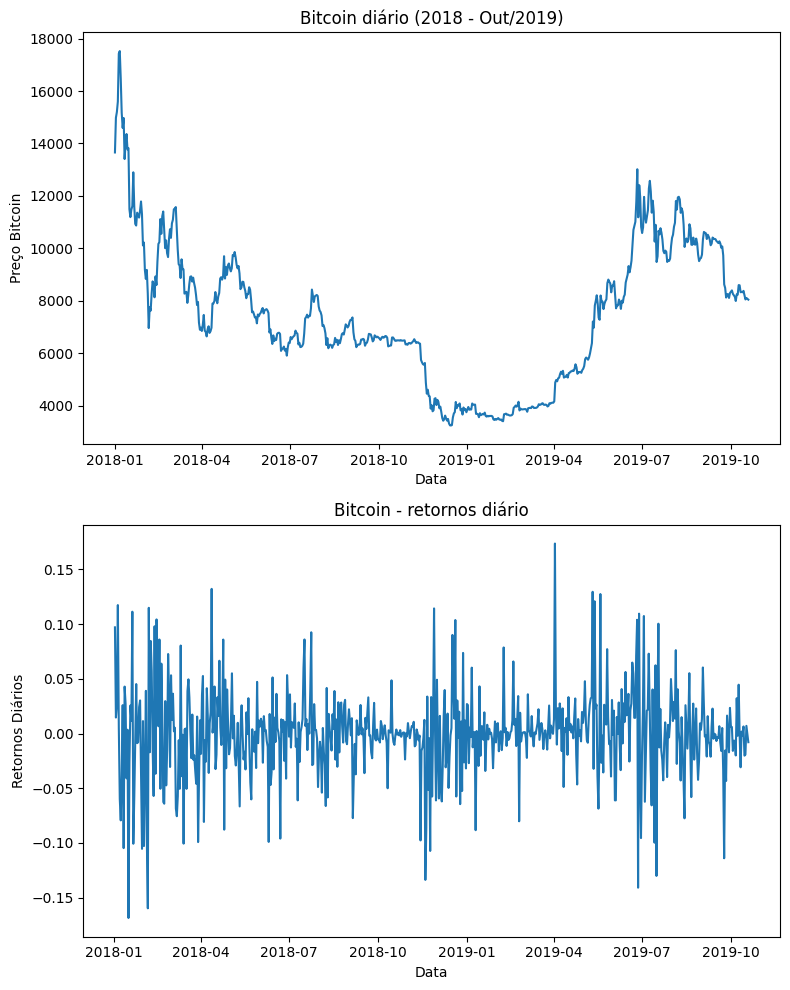

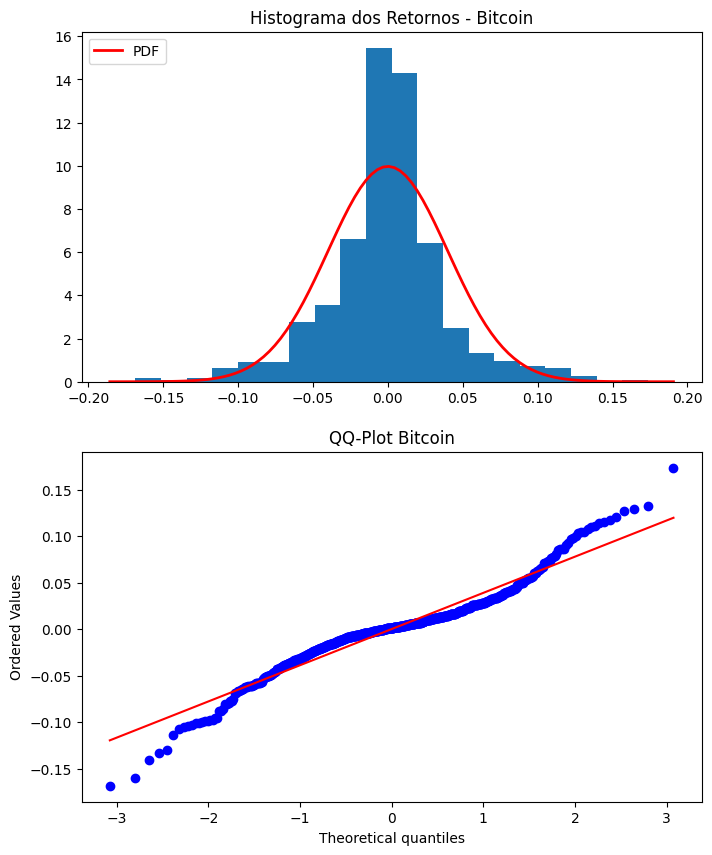

In [29]:
df = pd.read_excel(chapter_dir / "BitCoin.xlsx", index_col=0, header=None)
retornos = df.pct_change().dropna()

plota_graficos(df, retornos, "Bitcoin")

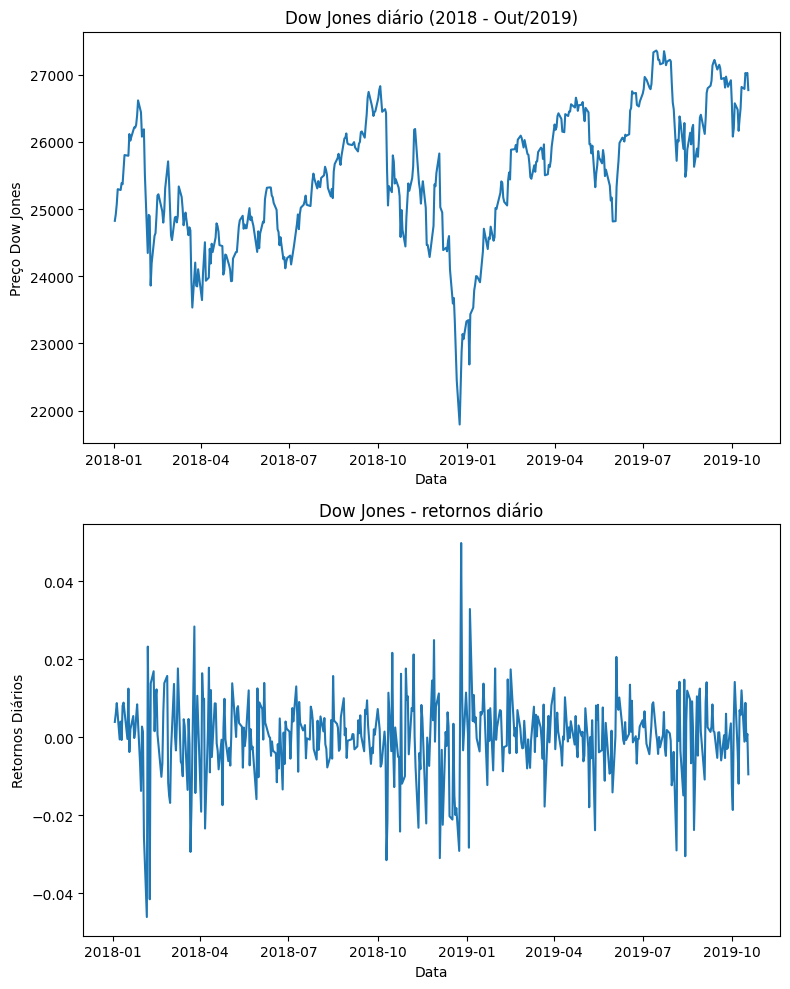

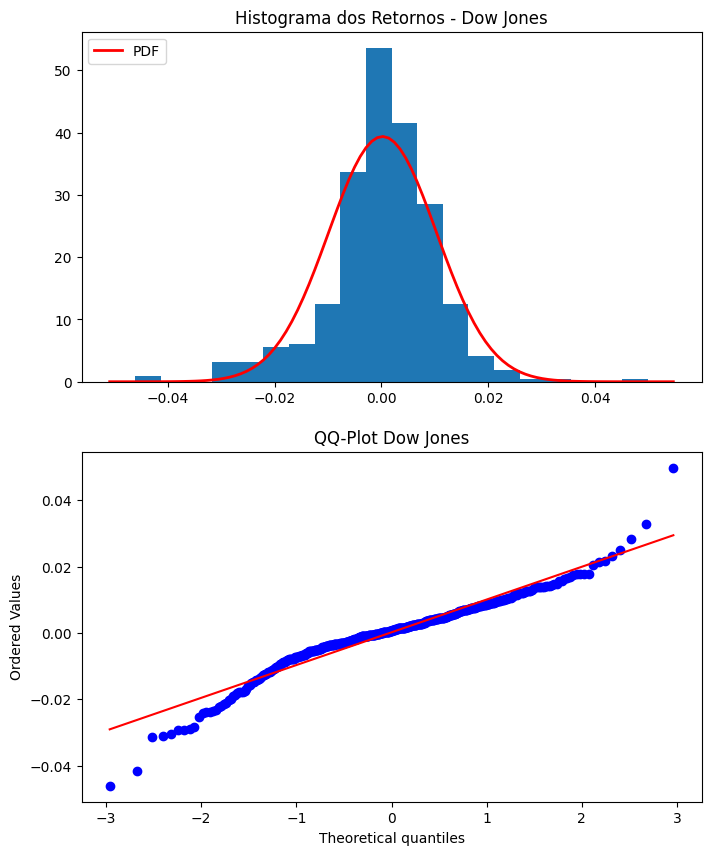

In [30]:
df = pd.read_excel(chapter_dir / "DowJ.xlsx", index_col=0, header=None)
retornos = df.pct_change().dropna()
plota_graficos(df, retornos, "Dow Jones")

# 3.9 - ANÁLISE DE REGRESSÃO LINEAR NO MERCADO FINANCEIRO

In [31]:
dados1 = pd.read_excel(chapter_dir / "Ibv.xlsx", index_col=0, header=None)
dados2 = pd.read_excel(chapter_dir / "Petrobras.xlsx", index_col=0, header=None)

dados1 = np.array(dados1)
dados2 = np.array(dados2)


+++++++++++++++ RESULTADOS DA REGRESSÃO LINEAR +++++++++++++++
  beta       beta0      r_value    p_value       std_err
0.000345   -7.216369    0.874   0.00000000    0.00000910


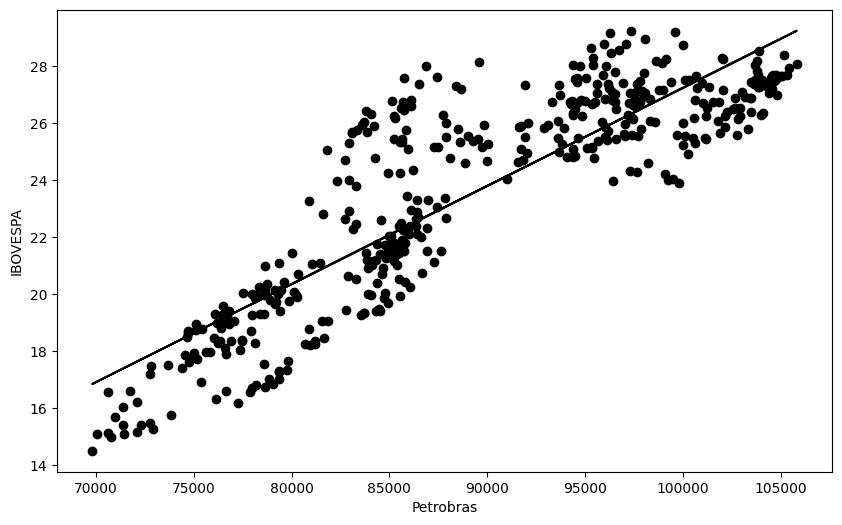

In [32]:
def regressao_linear(x, y, empresa1, empresa2):
    beta, beta0, r_value, p_value, std_err = stats.linregress(x, y)
    print(f"+++++++++++++++ RESULTADOS DA REGRESSÃO LINEAR +++++++++++++++")
    print(f"  beta       beta0      r_value    p_value       std_err")
    yLin = beta * dados1 + beta0
    print(f"{beta[0]:.6f}   {beta0[0]:.6f}    {r_value[0]:.3f}   {p_value[0]:.8f}    {std_err[0]:.8f}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(dados1, yLin, "-k", dados1, dados2, "ok")
    plt.xlabel(f"{empresa1}")
    plt.ylabel(f"{empresa2}")
    plt.show()
    
    return

    
regressao_linear(dados1, dados2, "Petrobras", "IBOVESPA")

+++++++++++++++ RESULTADOS DA REGRESSÃO LINEAR +++++++++++++++
  beta       beta0      r_value    p_value       std_err
0.191314   44.974840    0.160   0.00071314    0.05613172


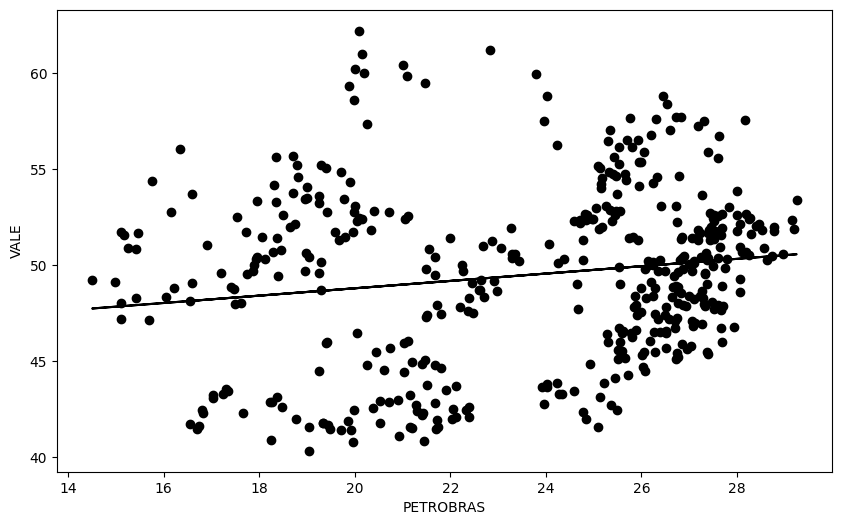

In [33]:
dados1 = pd.read_excel(chapter_dir / "Petrobras.xlsx", index_col=0, header=None)
dados2 = pd.read_excel(chapter_dir / "Vale3.xlsx", index_col=0, header=None)

dados1 = np.array(dados1)
dados2 = np.array(dados2)

regressao_linear(dados1, dados2, "PETROBRAS", "VALE")

# 3.10 - TESTES ESTATÍSTICOS PARA DIFERENÇAS ENTRE DADOS

In [34]:
dados1 = [10,11,10,9,8,9,10,11,12,9,10,8]
dados2 = [5,6,9,10,8,5,4,5,6,7,8,5]

In [35]:
stats.ttest_ind(dados1, dados2)

TtestResult(statistic=np.float64(5.023474307453664), pvalue=np.float64(4.9773916488576287e-05), df=np.float64(22.0))

### Teste t-student duas amostras

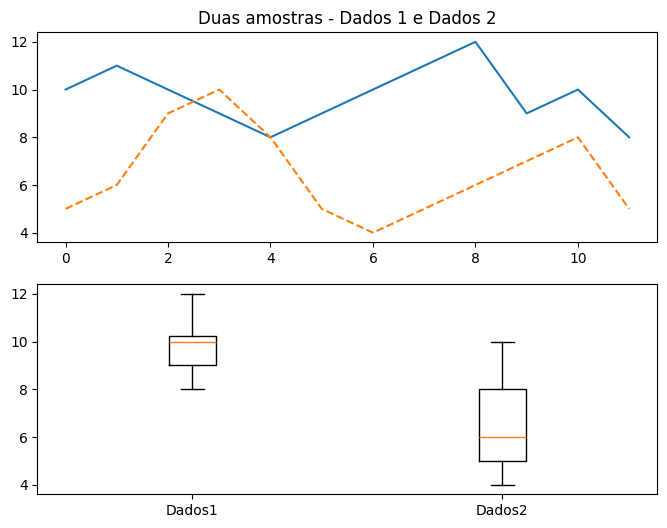

TtestResult(statistic=np.float64(5.023474307453664), pvalue=np.float64(4.9773916488576287e-05), df=np.float64(22.0))


In [36]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8,6))
axs[0].plot(dados1, "-")
axs[0].plot(dados2, "--")
axs[0].set_title("Duas amostras - Dados 1 e Dados 2")

axs[1].boxplot([dados1, dados2], tick_labels=["Dados1", "Dados2"], showfliers=False)
plt.show()

print(stats.ttest_ind(dados1, dados2))

## Retornos da VALE3 e PETR4

In [37]:
def compara_retornos(empresa1, empresa2):
    arquivo1 = chapter_dir / dicio[empresa1]
    arquivo2 = chapter_dir / dicio[empresa2]
    df1 = pd.read_excel(arquivo1, index_col=0, header=None, parse_dates=True)
    df2 = pd.read_excel(arquivo2, index_col=0, parse_dates=True, header=None)
    retorno1 = df1.pct_change().dropna()
    retorno2 = df2.pct_change().dropna()
    
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,8))
    axs[0].plot(retorno1)
    axs[0].set_title(f"Retorno {empresa1}")

    axs[1].plot(retorno2)
    axs[1].set_title(f"Retorno {empresa2}")

    axs[2].boxplot([retorno1.iloc[:,0], retorno2.iloc[:,0]], tick_labels=[empresa1, empresa2], showfliers=False)

    plt.tight_layout()

    print(stats.ttest_ind(retorno1, retorno2))
    
    

TtestResult(statistic=array([0.59811645]), pvalue=array([0.5499144]), df=array([890.]))


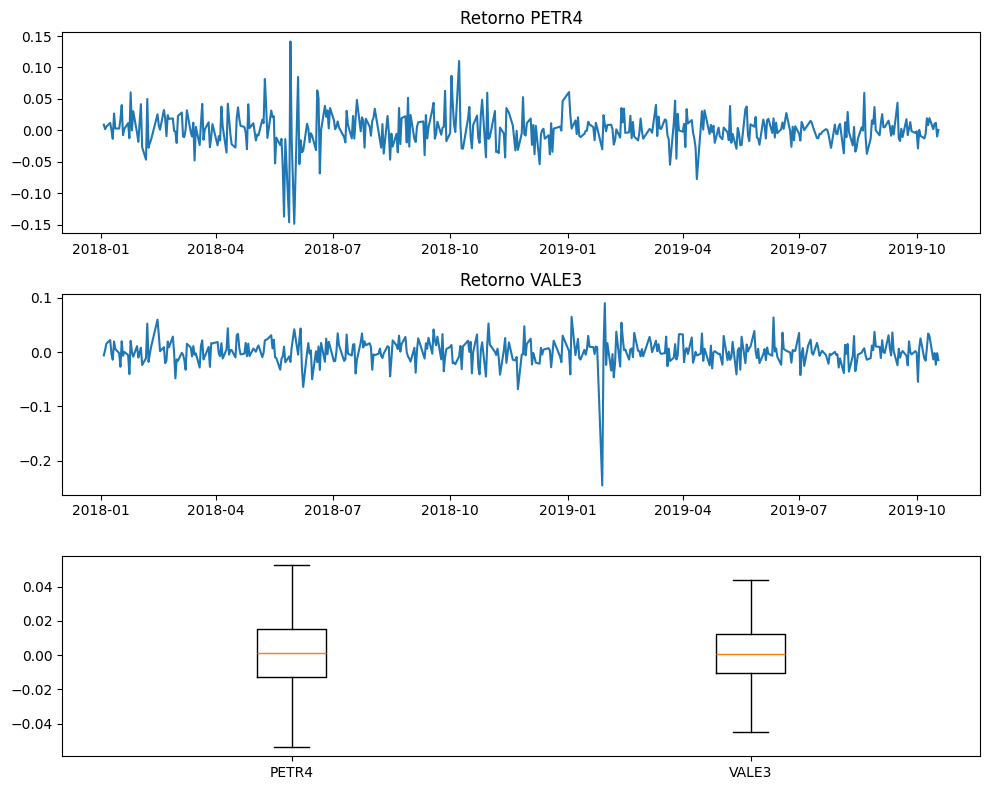

In [38]:
compara_retornos("PETR4", "VALE3")

# Exemplo 3.11 - Ibovespa e Dow Jones

TtestResult(statistic=array([0.68067242]), pvalue=array([0.49625465]), df=array([896.]))


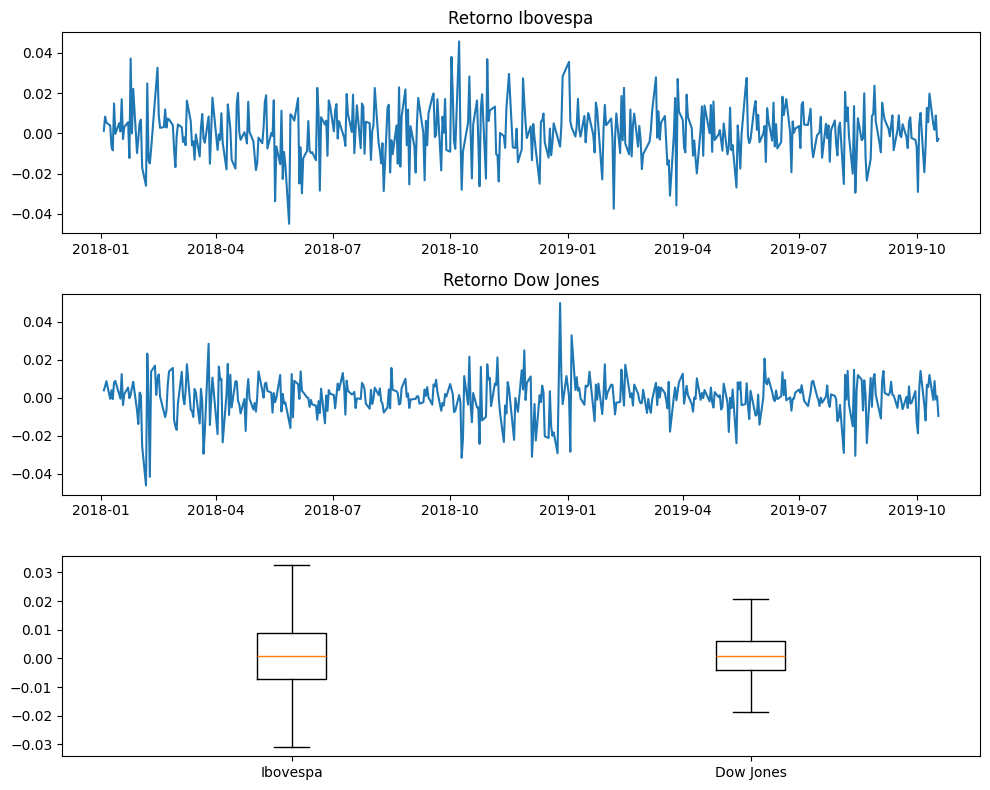

In [39]:
compara_retornos("Ibovespa", "Dow Jones")

# Exemplo 3.12 - Petrobras e Bitcoin

TtestResult(statistic=array([0.70702057]), pvalue=array([0.47970358]), df=array([1099.]))


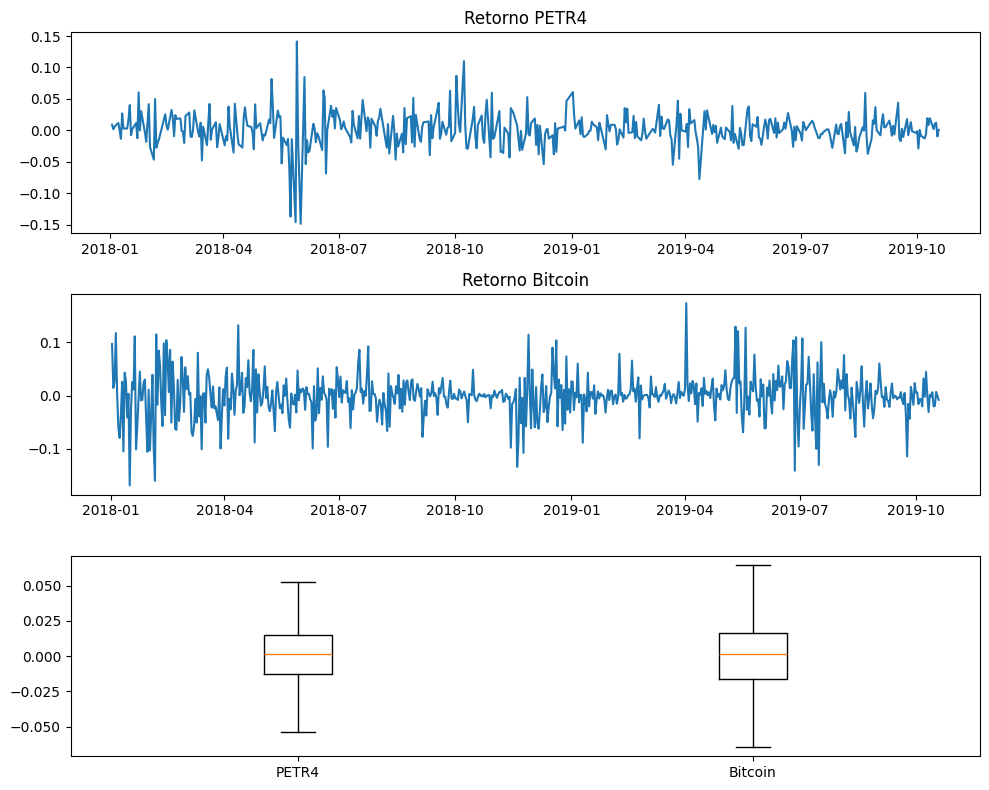

In [40]:
compara_retornos("PETR4", "Bitcoin")

# 3.11 - COEFICIENTE DE CORRELAÇÃO

+++++++++++++++ RESULTADOS DA REGRESSÃO LINEAR +++++++++++++++
  beta       beta0      r_value    p_value       std_err
0.000345   -7.216369    0.874   0.00000000    0.00000910


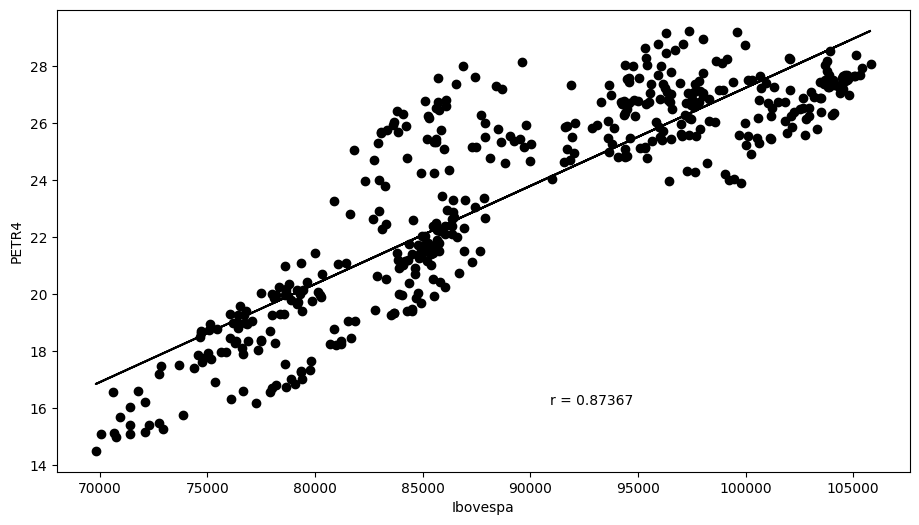

In [41]:
def regressao_linear(empresa1, empresa2):
    arquivo1 = chapter_dir / dicio[empresa1]
    arquivo2 = chapter_dir / dicio[empresa2]
    df1 = pd.read_excel(arquivo1, index_col=0, header=None, parse_dates=True)
    df2 = pd.read_excel(arquivo2, index_col=0, parse_dates=True, header=None)
    
    x = np.array(df1)
    y = np.array(df2)
    
    beta, beta0, r_value, p_value, std_err = stats.linregress(x, y)
    print(f"+++++++++++++++ RESULTADOS DA REGRESSÃO LINEAR +++++++++++++++")
    print(f"  beta       beta0      r_value    p_value       std_err")
    yLin = beta * x + beta0
    print(f"{beta[0]:.6f}   {beta0[0]:.6f}    {r_value[0]:.3f}   {p_value[0]:.8f}    {std_err[0]:.8f}")
    
    plt.figure(figsize=(11, 6))
    plt.plot(x, yLin, "-k", x, y, "ok")
    plt.xlabel(f"{empresa1}")
    plt.ylabel(f"{empresa2}")
    plt.annotate(f"r = {r_value[0]:.5f}", xy=(0.5, 0.2), xycoords="figure fraction")
    plt.show()
    
    return

    
regressao_linear("Ibovespa", "PETR4")

+++++++++++++++ RESULTADOS DA REGRESSÃO LINEAR +++++++++++++++
  beta       beta0      r_value    p_value       std_err
0.858989   -14462.287214    0.319   0.00000000    0.12016067


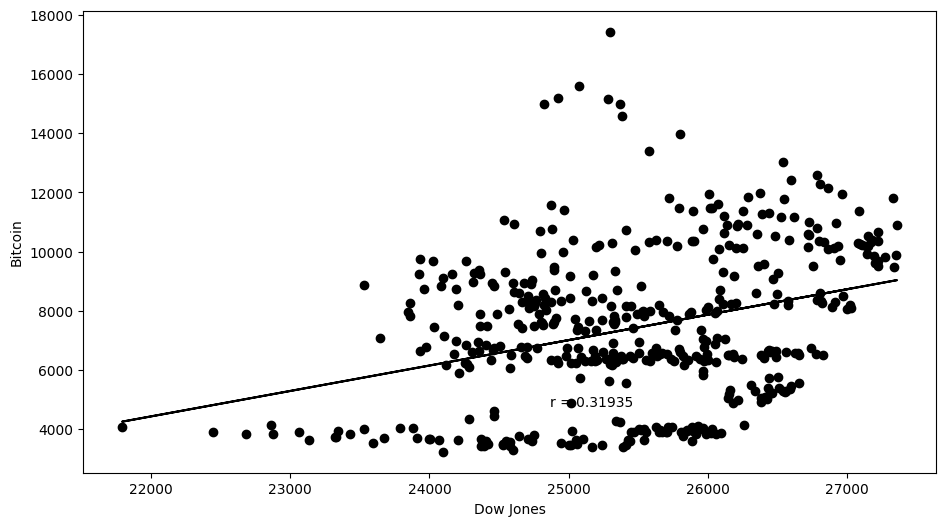

In [42]:
empresa2 = "Bitcoin"
empresa1 = "Dow Jones"
arquivo1 = chapter_dir / dicio[empresa1]
arquivo2 = chapter_dir / dicio[empresa2]
df1 = pd.read_excel(arquivo1, index_col=0, header=None, parse_dates=True)
df2 = pd.read_excel(arquivo2, index_col=0, parse_dates=True, header=None)

x = df1.loc[df1.index.intersection(df2.index)]
y = df2.loc[df1.index.intersection(df2.index)]
x = np.array(x)
y = np.array(y)

beta, beta0, r_value, p_value, std_err = stats.linregress(x, y)
print(f"+++++++++++++++ RESULTADOS DA REGRESSÃO LINEAR +++++++++++++++")
print(f"  beta       beta0      r_value    p_value       std_err")
yLin = beta * x + beta0
print(f"{beta[0]:.6f}   {beta0[0]:.6f}    {r_value[0]:.3f}   {p_value[0]:.8f}    {std_err[0]:.8f}")

plt.figure(figsize=(11, 6))
plt.plot(x, yLin, "-k", x, y, "ok")
plt.xlabel(f"{empresa1}")
plt.ylabel(f"{empresa2}")
plt.annotate(f"r = {r_value[0]:.5f}", xy=(0.5, 0.2), xycoords="figure fraction")
plt.show()

# 3.12 - Visualização estatística de dados com SEABORN

In [43]:
teste = pd.read_excel(chapter_dir / "DadExemp.xlsx", header=None)
teste.head()

,0,1,2,3
0,8,10,7,5
1,8,9,7,5
2,5,8,8,5
3,5,9,8,1
4,4,9,6,2


<Axes: >

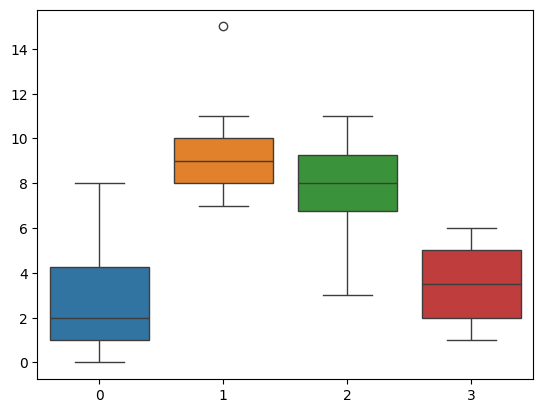

In [44]:
sns.boxplot(data=teste, orient="v")

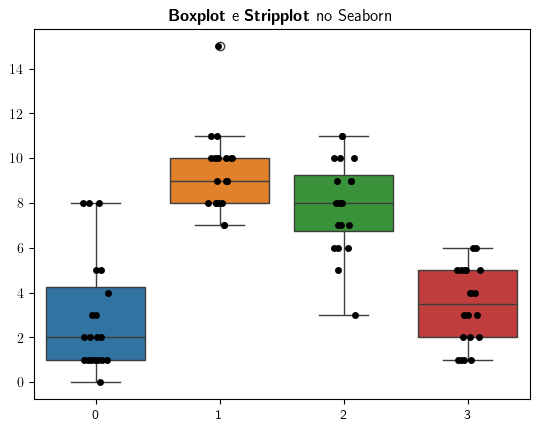

In [45]:
from matplotlib import rc
rc("text", usetex=True)

sns.boxplot(data=teste, orient="v")
sns.stripplot(data=teste, marker="o", color="black")
plt.title(r'$\textbf{Boxplot}$' + " e " r'$\textbf{Stripplot}$' + " no Seaborn")
plt.show()
                          

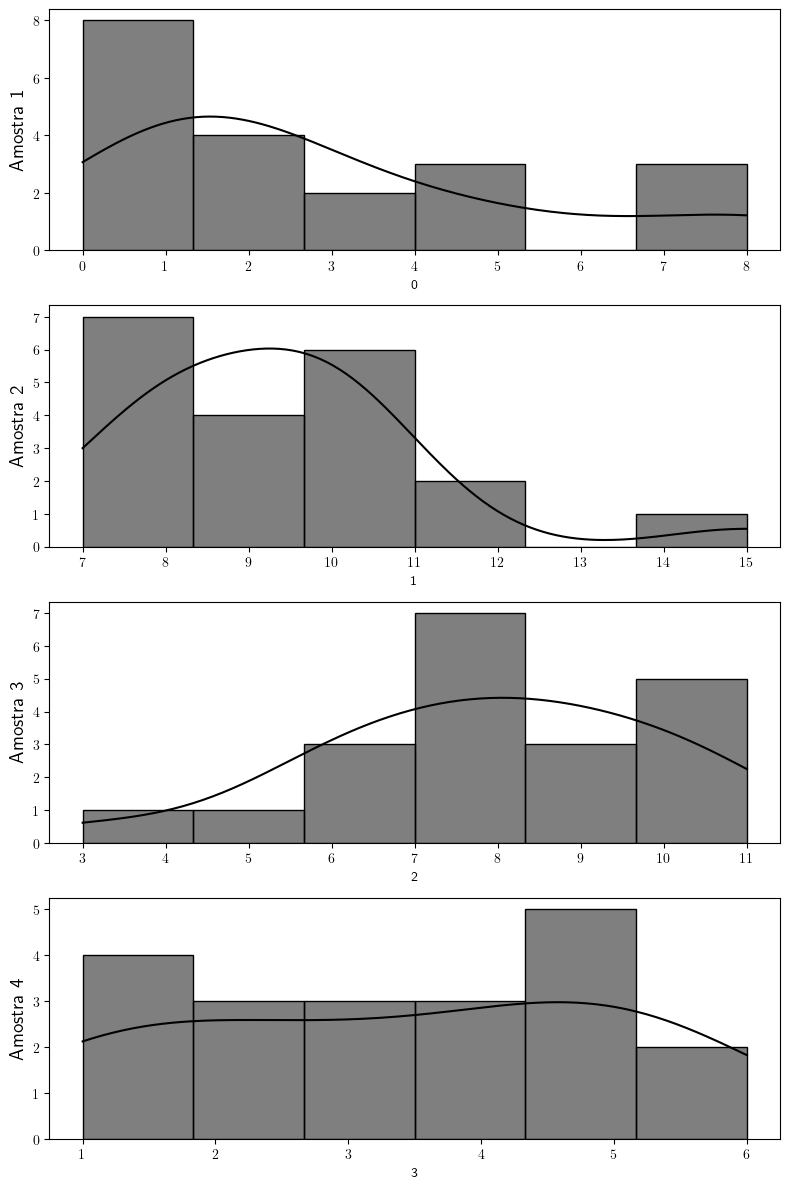

In [46]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,12))

for i, coluna in enumerate(teste.columns):
    sns.histplot(teste[coluna], kde=True, color="black", ax=ax[i])
    ax[i].set_ylabel(f"Amostra {i+1}", fontsize=14)

plt.tight_layout()
plt.show()

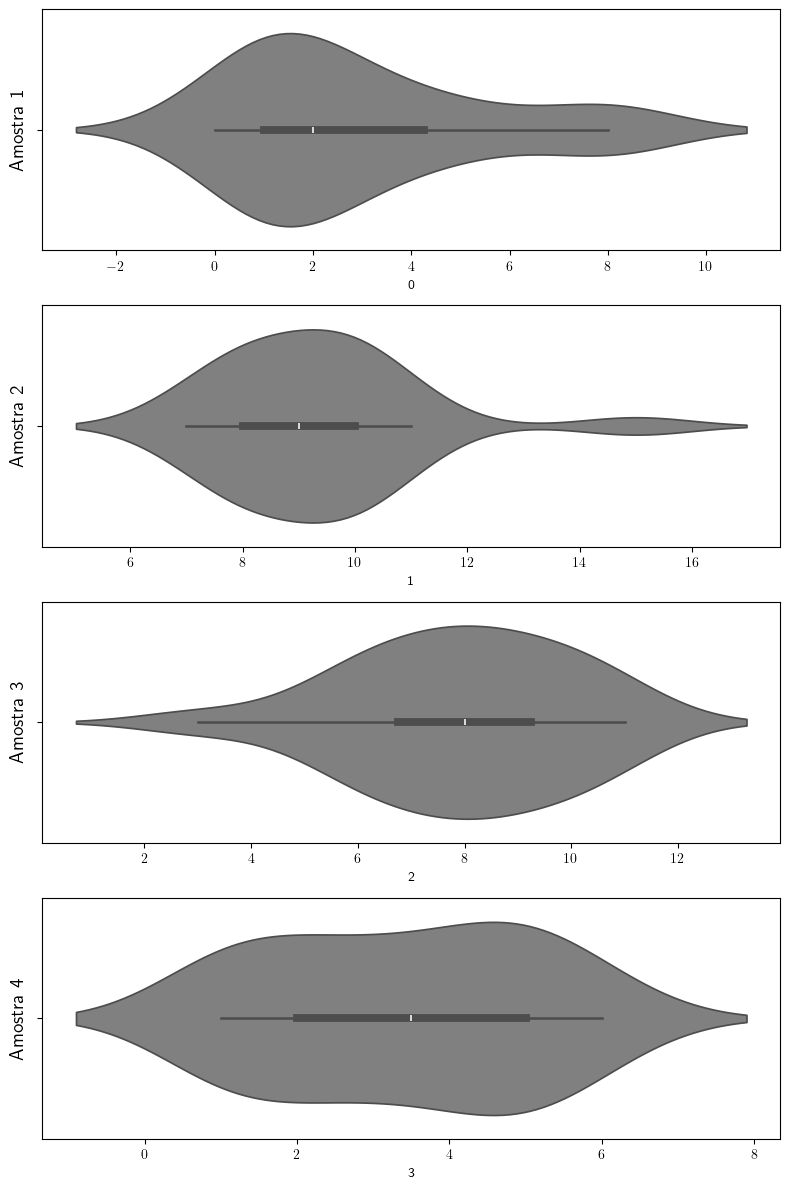

In [47]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,12))

for i, coluna in enumerate(teste.columns):
    sns.violinplot(teste[coluna], orient = "h", color="grey", ax=ax[i])
    ax[i].set_ylabel(f"Amostra {i+1}", fontsize=14)

plt.tight_layout()
plt.show()

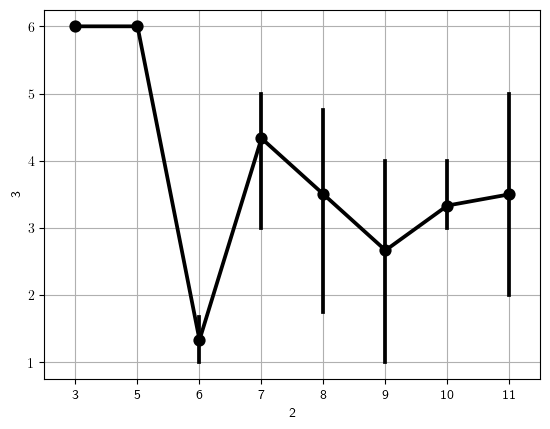

In [48]:
sns.pointplot(x=teste[2], y=teste[3], color="black")
plt.grid()
plt.show()

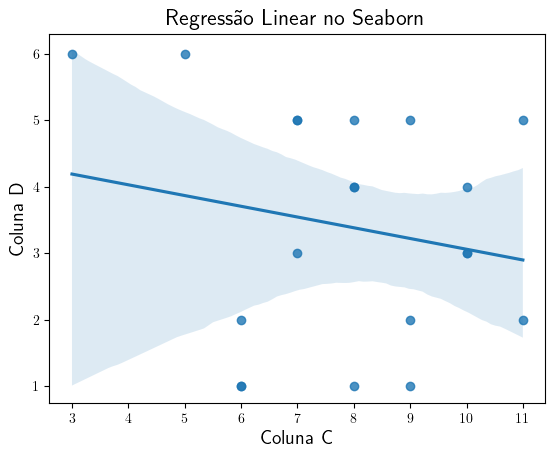

In [49]:
plt.figure()
sns.regplot(x=teste[2], y=teste[3])
plt.xlabel("Coluna C", fontsize=14)
plt.ylabel("Coluna D", fontsize=14)
plt.title("Regressão Linear no Seaborn", fontweight="bold", fontsize=16)
plt.show()

# Exemplo 3.14 - Dow Jones e Bitcoin

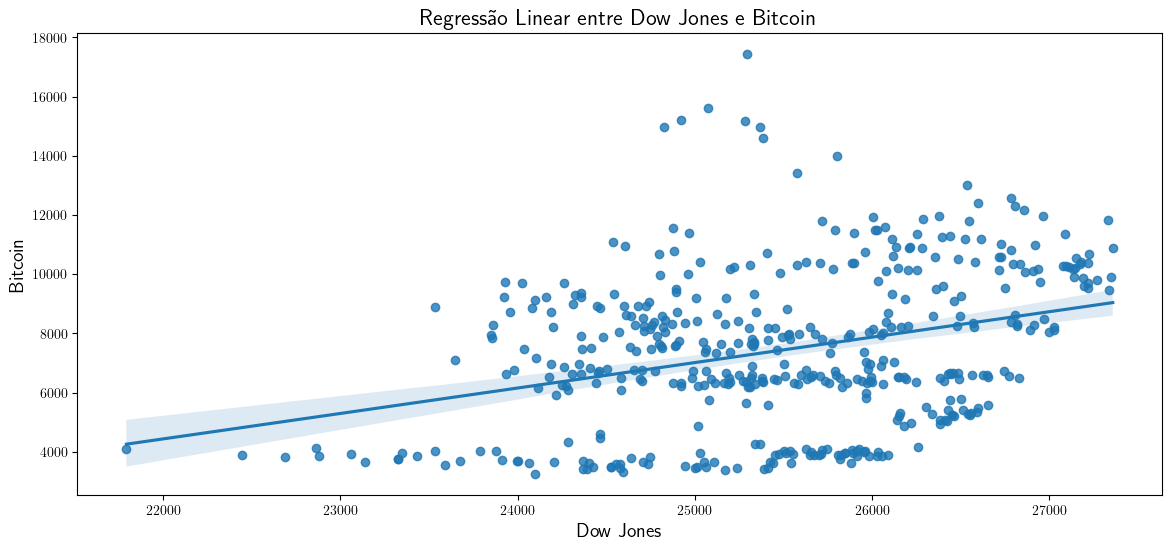

In [50]:
dados = pd.read_excel(chapter_dir / "DowJ_BitC_Juntos.xlsx", header=None)

plt.figure(figsize=(14,6))
sns.regplot(x=dados[1], y=dados[2])
plt.ylabel("Bitcoin", fontsize=14)
plt.xlabel("Dow Jones", fontsize=14)
plt.title("Regressão Linear entre Dow Jones e Bitcoin", fontweight="bold", fontsize=16)
plt.show()


# Exemplo 3.15 - PETR4 e VALE3

In [51]:
petr4 = pd.read_excel(chapter_dir / "Petrobras.xlsx", header=None)
retorno_petr4 = petr4[1].pct_change().dropna()
vale3 = pd.read_excel(chapter_dir / "Vale3.xlsx", header=None)
retorno_vale3 = vale3[1].pct_change().dropna()
ibov = pd.read_excel(chapter_dir / "Ibv.xlsx", header=None)
retorno_ibov = ibov[1].pct_change().dropna()

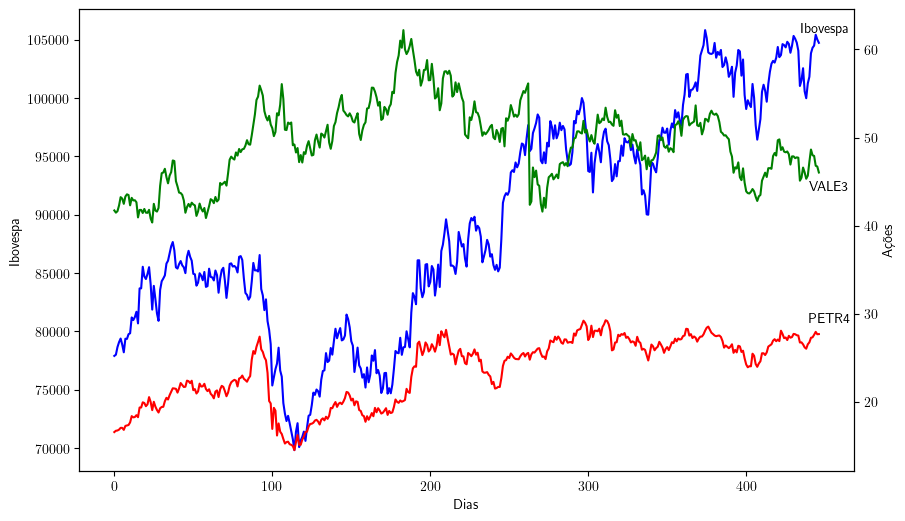

In [52]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Dias")
ax1.set_ylabel("Ibovespa")
ax1.plot(ibov[1], label="Ibovespa", color="blue")
ax1.text(435, 105590, "Ibovespa")

ax2 = ax1.twinx()
ax2.set_ylabel("Ações")
ax2.plot(petr4[1], label="PETR4", color="red")
ax2.plot(vale3[1], label="VALE3", color="green")
ax2.text(440, 44, "VALE3")
ax2.text(440, 29, "PETR4")

plt.show()

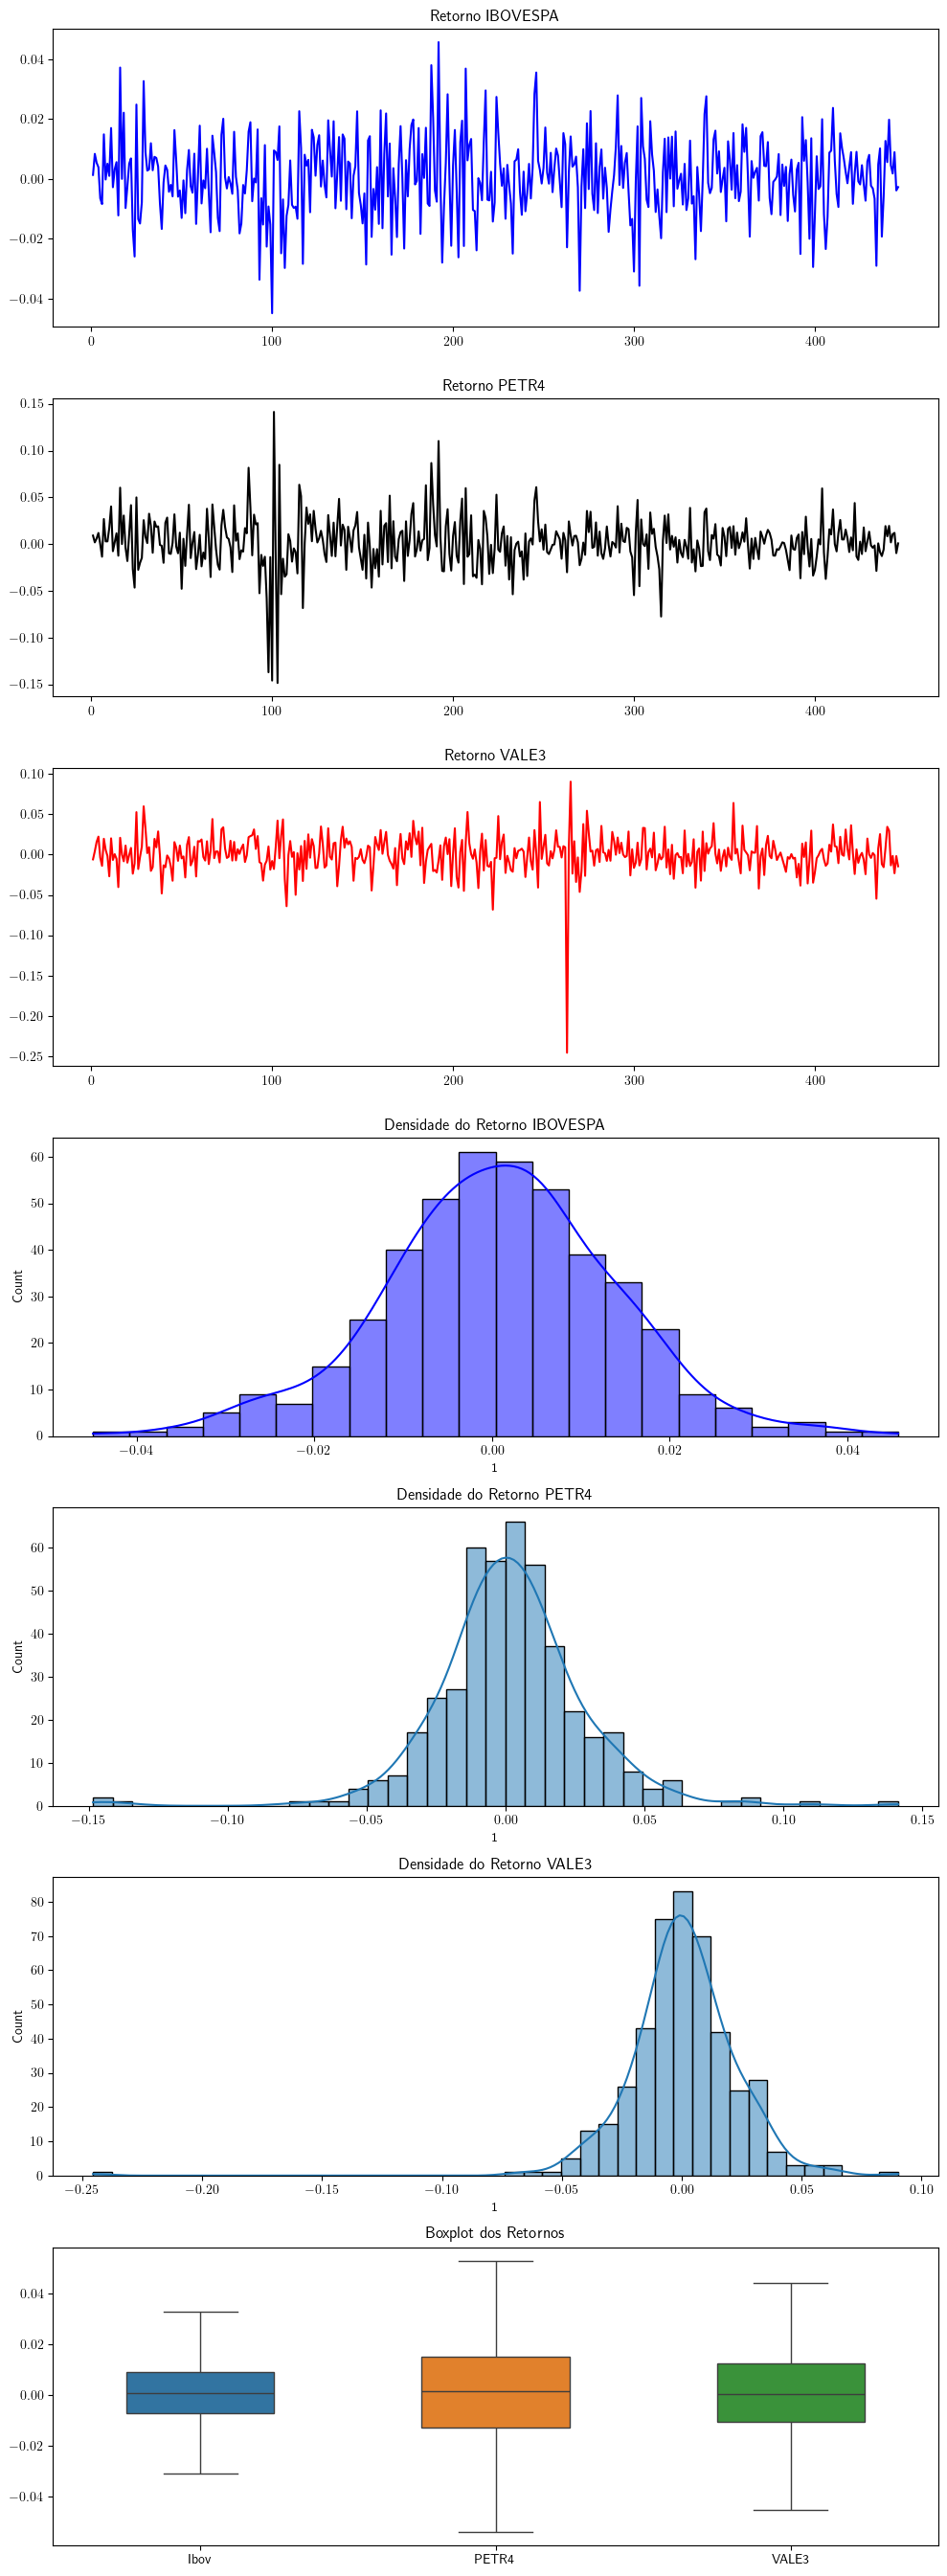

In [53]:
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(10, 27))

# Plota retornos IBOVESPA, PETR3 e VALE3
axs[0].plot(retorno_ibov, color="blue")
axs[0].set_title("Retorno IBOVESPA")
axs[1].plot(retorno_petr4, color="black")
axs[1].set_title("Retorno PETR4")
axs[2].plot(retorno_vale3, color="red")
axs[2].set_title("Retorno VALE3")


# Plota histogramas com densidade
sns.histplot(retorno_ibov, kde=True, color="blue", ax=axs[3])
axs[3].set_title("Densidade do Retorno IBOVESPA")
sns.histplot(retorno_petr4, kde=True, ax=axs[4])
axs[4].set_title("Densidade do Retorno PETR4")
sns.histplot(retorno_vale3, kde=True, ax=axs[5])
axs[5].set_title("Densidade do Retorno VALE3")

# Plota Boxplots
sns.boxplot([retorno_ibov.values, retorno_petr4.values, retorno_vale3.values], orient="v", width=0.5, showfliers=False, ax=axs[6])
plt.xticks(ticks=[0, 1, 2], labels=["Ibov", "PETR4", "VALE3"])
plt.title("Boxplot dos Retornos")

plt.tight_layout()
plt.show()

# Exemplo 3.16 - Compara crises de 1929 e 2008

In [56]:
crise1929 = pd.read_excel(chapter_dir / "Compara_CriseDJ.xlsx", usecols=[0, 1], header=None)
crise1929.set_index(0, inplace=True)
retorno1929 = crise1929.pct_change().dropna()

crise2008 = pd.read_excel(chapter_dir / "Compara_CriseDJ.xlsx", usecols=[2, 3], header=None)
crise2008.set_index(2, inplace=True)
retorno2008 = crise2008.pct_change().dropna()


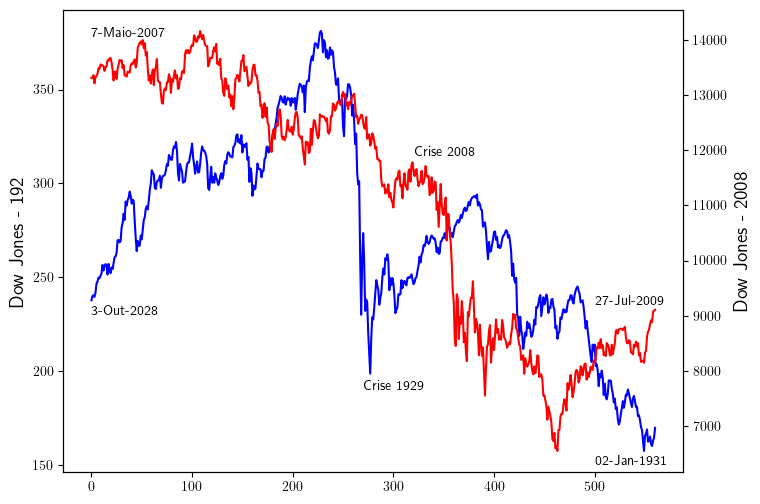

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(crise1929.values, label="Crise 1929", color="blue")
ax.set_ylabel("Dow Jones - 192", fontsize=14)
ax.annotate("3-Out-2028", xy=(0, 230))
ax.annotate("Crise 1929", xy=(270, 190))
ultimo_dia = crise1929.index[-1].strftime("%d-%b-%Y")
ax.annotate(ultimo_dia, xy=(500, 150))

ax2 = ax.twinx()
ax2.plot(crise2008.values, label="Crise 2008", color="red")
ax2.set_ylabel("Dow Jones - 2008", fontsize=14)
ax2.annotate("7-Maio-2007", xy=(0, 14050), fontweight="bold")
ax2.annotate("Crise 2008", xy=(320, 11900), fontweight="bold")
ultimo_dia = crise2008.index[-1].strftime("%d-%b-%Y")
ax2.annotate(ultimo_dia, xy=(500, 9200))

plt.xlabel("Dias")
plt.show()

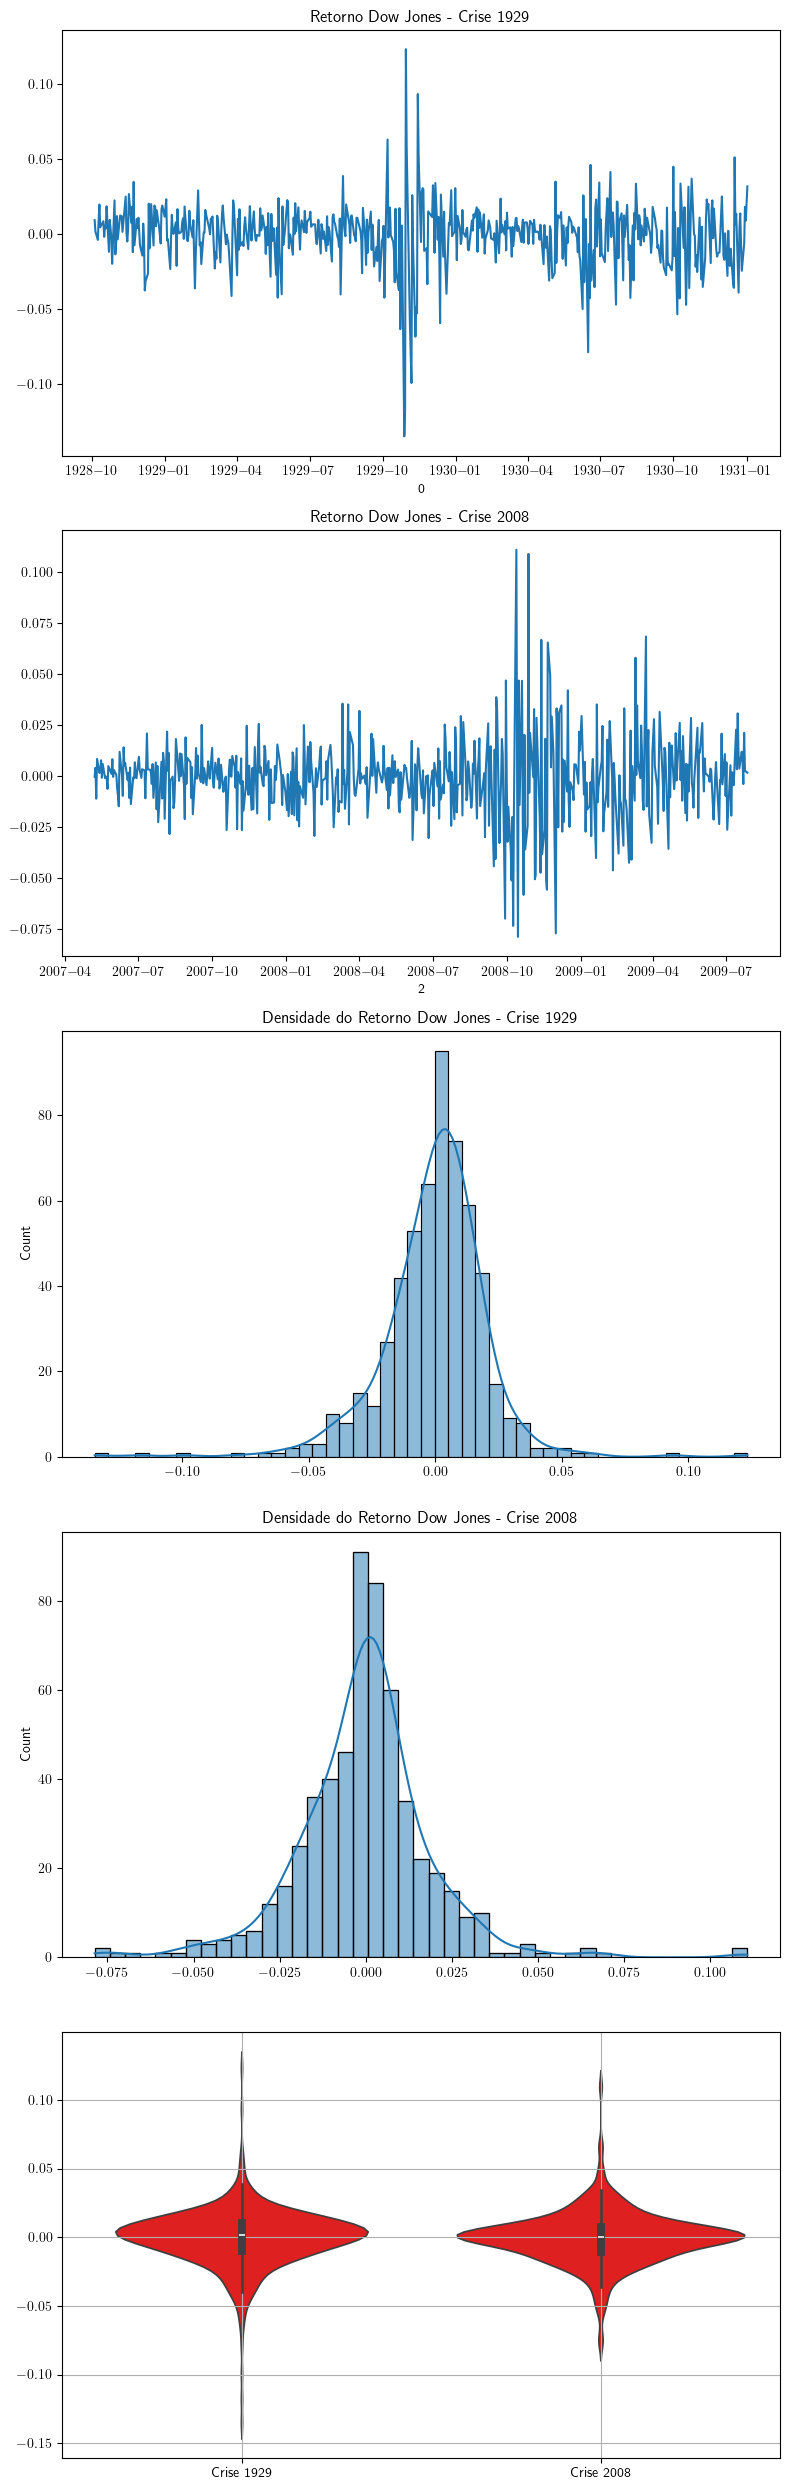

In [81]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(8, 25))

sns.lineplot(data=retorno1929, ax=axs[0], color="blue", legend=False)
axs[0].set_title(f"Retorno Dow Jones - Crise 1929")

sns.lineplot(data=retorno2008, ax=axs[1], color="red", legend=False)
axs[1].set_title(f"Retorno Dow Jones - Crise 2008")

sns.histplot(retorno1929, kde=True, color="blue", ax=axs[2], legend=False)
axs[2].set_title(f"Densidade do Retorno Dow Jones - Crise 1929")

sns.histplot(retorno2008, kde=True, color="red", ax=axs[3], legend=False)
axs[3].set_title(f"Densidade do Retorno Dow Jones - Crise 2008")

sns.violinplot([retorno1929.values.flatten(), retorno2008.values.flatten()], orient="v", color="red", ax=axs[4])
axs[4].grid()
axs[4].set_xticks([0, 1])
axs[4].set_xticklabels(["Crise 1929", "Crise 2008"])

plt.tight_layout()
plt.show()

# 3.13 - Exercícios

### 1)

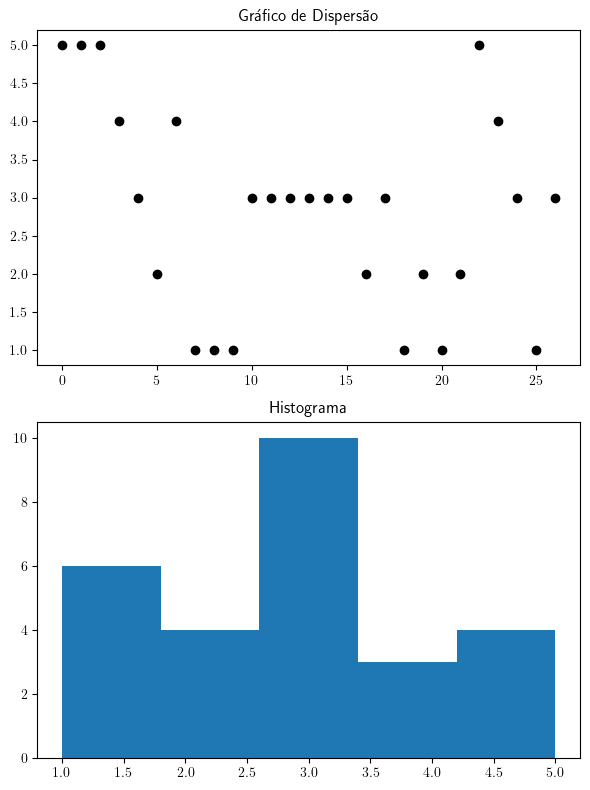

In [89]:
x = [5,5,5,4,3,2,4,1,1,1,3,3,3,3,3,3,2,3,1,2,1,2,5,4,3,1,3]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))

axs[0].scatter(range(len(x)), x, color="black")
axs[0].set_title("Gráfico de Dispersão")

axs[1].hist(x, bins=5)
axs[1].set_title("Histograma")

plt.tight_layout()
plt.show()

### 8) Baixar os dados do Ibovespa do Yahoo Finance entre 1/1/2018 e 18/10/2018. Em um subplot (2x2) plotar:
- plotar os dados do Ibovespa
- incluir dados de retorno diário
- histograma normalizado com densidade
- Boxplot

In [101]:
data_inicial = datetime(2018, 1, 1)
data_final = datetime(2018, 10, 19)

df = yf.download("^BVSP", start=data_inicial, end=data_final, progress=True, auto_adjust="True", multi_level_index=False)["Close"]
retornos = df.pct_change().dropna()


[*********************100%***********************]  1 of 1 completed


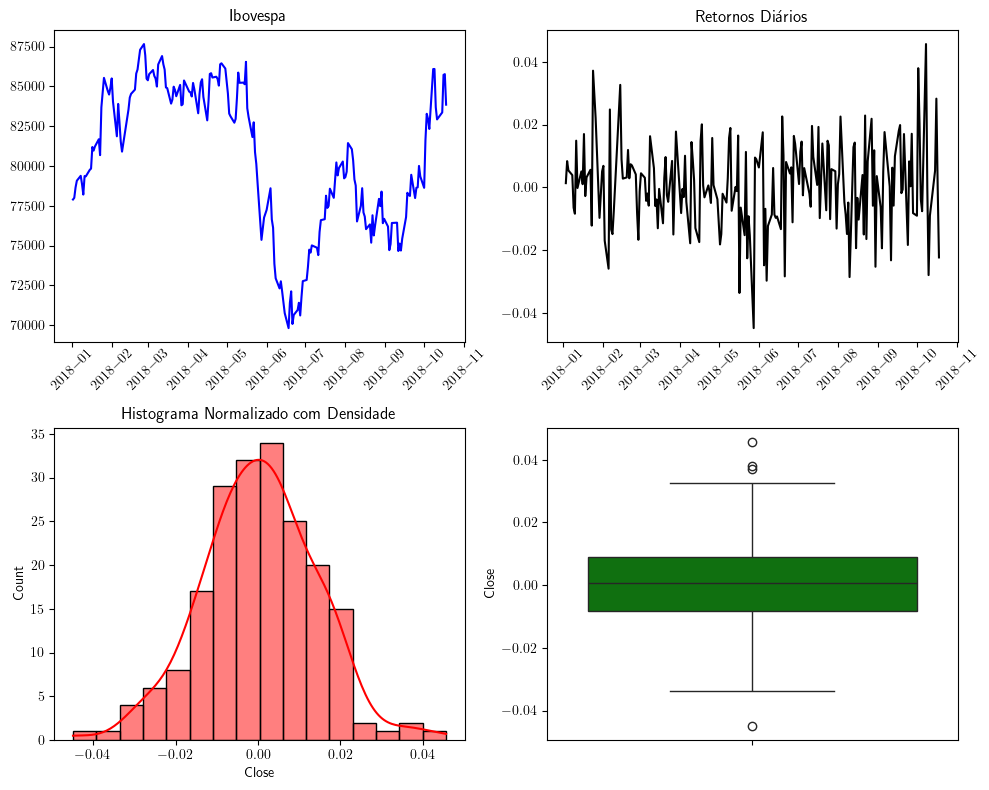

In [110]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

axs[0,0].plot(df, color="blue")
axs[0,0].set_title("Ibovespa")
axs[0,0].tick_params(rotation=45, axis="x", pad=0)

axs[0,1].plot(retornos, color="black")
axs[0,1].set_title("Retornos Diários")
axs[0,1].tick_params(rotation=45, axis="x", pad=0)

sns.histplot(retornos, kde=True, color="red", ax=axs[1,0])
axs[1,0].set_title("Histograma Normalizado com Densidade")

sns.boxplot(retornos, orient="v", color="green", ax=axs[1,1])

plt.tight_layout()
plt.show()

### 9) Baixar os dados da PETR4 para o mesmo, período e plotar os seguintes gráficos:
- Ibovespa
- PETR4
- histograma Ibovespa
- histograma PETR4

In [113]:
petr4 = yf.download("PETR4.SA", start=data_inicial, end=data_final,
                    progress=True, auto_adjust=True, multi_level_index=False)["Close"]
retorno_petr4 = petr4.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


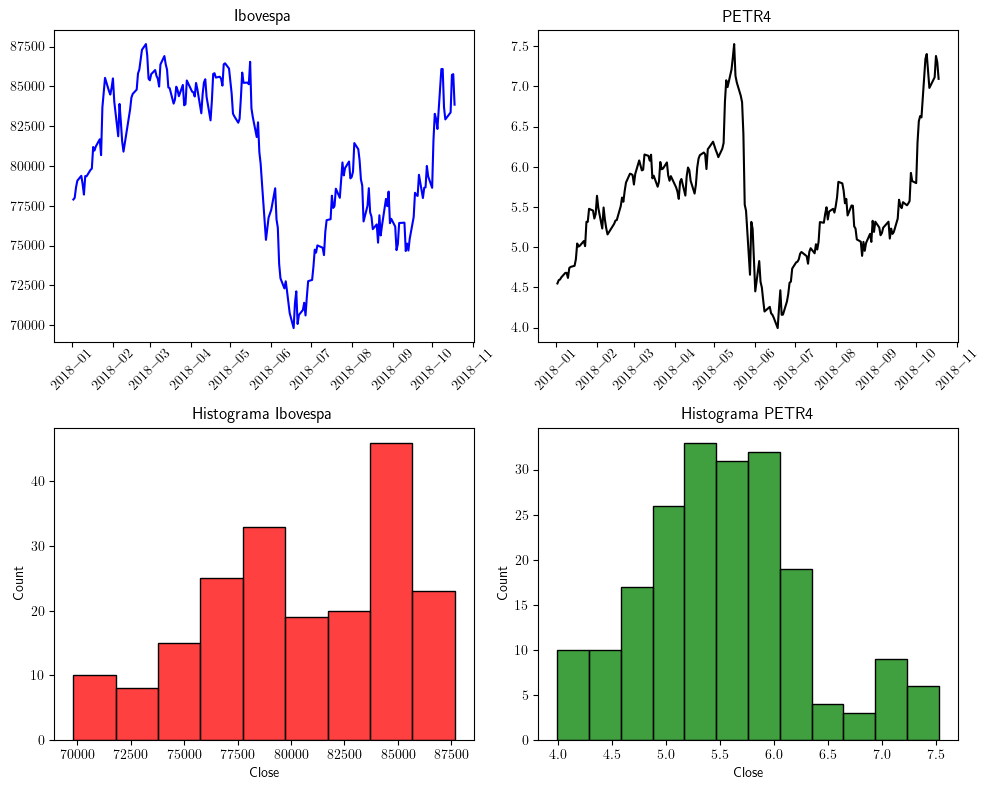

In [114]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

axs[0,0].plot(df, color="blue")
axs[0,0].set_title("Ibovespa")
axs[0,0].tick_params(rotation=45, axis="x", pad=0)

axs[0,1].plot(petr4, color="black")
axs[0,1].set_title("PETR4")
axs[0,1].tick_params(rotation=45, axis="x", pad=0)

sns.histplot(df, kde=False, color="red", ax=axs[1,0])
axs[1,0].set_title("Histograma Ibovespa")

sns.histplot(petr4, kde=False, color="green", ax=axs[1,1])
axs[1,1].set_title("Histograma PETR4")

plt.tight_layout()
plt.show()

### 9) Baixar os dados do BitCoin (close) no período acima, e plotar:
- Plotar BitCoin
- Plotar retornos do Bitcoin

Calcular e imprimir no console a média dos dez maiores valores BitCoin, a mediana, desvio-padrão populacional, valores máximos e mínimos desses dez valores

Estatísticas solicitadas para o Bitcoin:

Média: 15631.540
Mediana: 15185.550
Desvio Padrão: 1129.677
Valor Máximo: 17527.000
Valor Mínimo: 14360.200


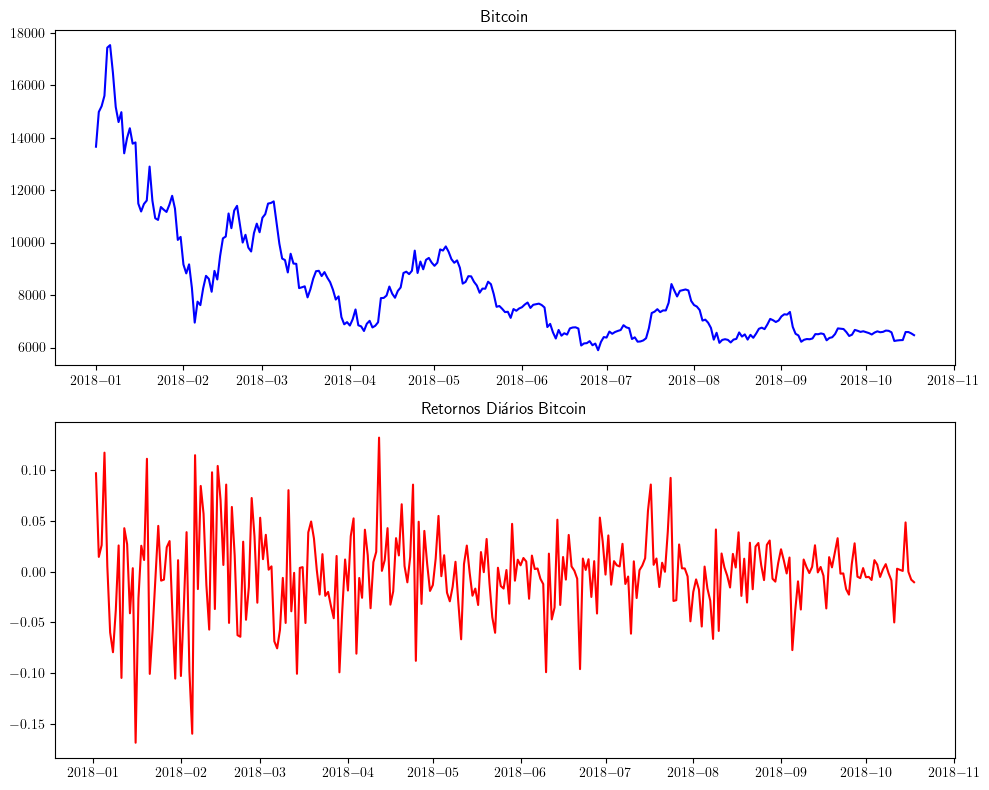

In [124]:
bitcoin = yf.download("BTC-USD", start=data_inicial, end=data_final, auto_adjust=True, progress=False, multi_level_index=False)["Close"]
retorno_bitcoin = bitcoin.pct_change().dropna()

sorted_bitcoin = bitcoin.sort_values(ascending=False)
top10 = sorted_bitcoin[:10]

print(f"Estatísticas solicitadas para o Bitcoin:\n")
print(f"Média: {top10.mean():.3f}")
print(f"Mediana: {top10.median():.3f}")
print(f"Desvio Padrão: {top10.std():.3f}")
print(f"Valor Máximo: {top10.max():.3f}")
print(f"Valor Mínimo: {top10.min():.3f}")

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axs[0].plot(bitcoin, color="blue")
axs[0].set_title("Bitcoin")
axs[1].plot(retorno_bitcoin, color="red")
axs[1].set_title("Retornos Diários Bitcoin")

plt.tight_layout()
plt.show()

In [119]:
bitcoin.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-10-09', '2018-10-10', '2018-10-11', '2018-10-12',
               '2018-10-13', '2018-10-14', '2018-10-15', '2018-10-16',
               '2018-10-17', '2018-10-18'],
              dtype='datetime64[ns]', name='Date', length=291, freq=None)